- Geovanne Mansano Fritch da Silva, RA 791072
- Luana de Queiroz Garcia, RA 740953
- Matheus Bessa Coutinho Colombo, RA 801839
- Pedro Freire Baleeiro, RA 790984
- Thiago César Silva Barbieri, RA 779807

Dataset - https://archive.ics.uci.edu/dataset/45/heart+disease

# Importância do tema

As doenças cardíacas representam um dos desafios mais significativos em saúde globalmente. Essas condições afetam o coração e os vasos sanguíneos, podendo resultar em graves complicações, como ataques cardíacos e acidentes vasculares cerebrais. Com fatores de risco variados, incluindo genética, estilo de vida e saúde geral, a prevenção e o diagnóstico precoces desempenham papéis cruciais na mitigação do impacto das doenças cardíacas. Portanto, a análise de dados relacionados a doenças cardíacas desempenha um papel vital na identificação de padrões, fatores de risco e melhores práticas de tratamento, contribuindo para um cuidado mais eficaz e uma saúde cardiovascular aprimorada.

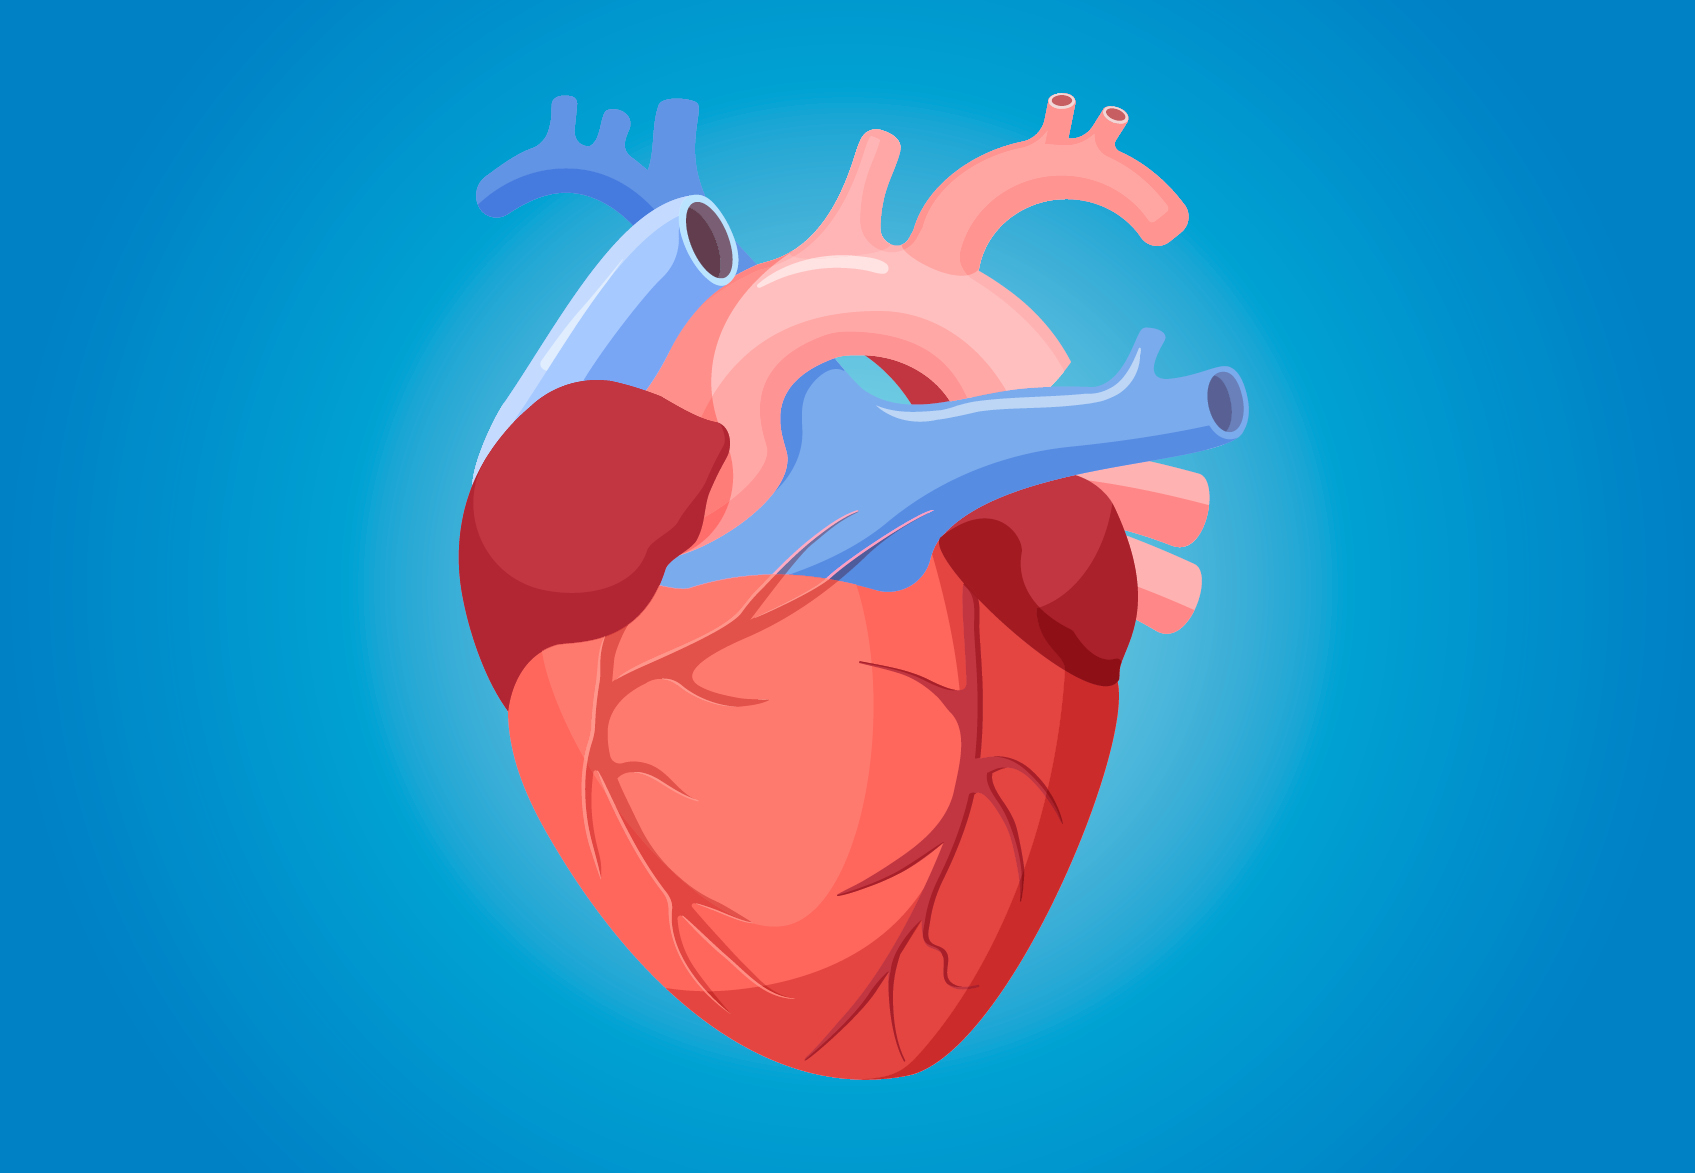

### Complexidade
O dataset apresenta 14 diferentes tipos de dados, com 4 atributos Contínuos e 10 Discretos, em que esta variedade de dados nos atributos representa uma certa complexidade na análise e maior cuidade em seu tratamento antes da aplicação dos classificadores.

### Desafiador
O conjunto de dados é desafiador por alguns pontos, como:

- Complexidade Clínica: As doenças cardíacas são uma categoria complexa de condições médicas, que abrangem uma variedade de subtipos, sintomas e fatores de risco. Isso pode tornar a caracterização e o diagnóstico precisos um desafio.
- Heterogeneidade Populacional: A população de pacientes com doenças cardíacas pode ser altamente heterogênea em termos de idade, sexo, histórico médico e estilo de vida. Isso pode dificultar a identificação de padrões consistentes nos dados.
- Aborda uma área em que não dominamos e devido sua complexidade e variedade de atributos, torna-se um desafio ao grupo, pois nos desafia a utilizar diversas técnicas e aprofundar nosso conhecimento na matéria.

# Tópicos:
## 1.Introdução
## 2. Exploração do conjunto de dados
## 3. Limpeza e tratamento dos dados
## 4. Algoritmos de Clusterização
- 4.1 K-Means

- 4.2 Aglomerativo

- 4.3 HDBSCAN

- 4.4 DBSCAN

## 5. Conclusão

# 1.Introdução


## Abordagem do problema

Este relatório analisa um conjunto de dados relacionado a pacientes com doenças cardíacas. As doenças cardíacas são uma das principais causas de morbidade e mortalidade globalmente. O objetivo desta análise é identificar padrões e agrupamentos nos dados, utilizando o algoritmo K-Means. Isso pode fornecer insights importantes para a prevenção e tratamento dessas doenças. Este relatório descreve o processo de análise, resultados e implicações clínicas decorrentes desse estudo.

## Descrição do dataset

- **age**: idade

- **sex**: sexo

- **cp **(chest pain): dor no peito

- **trestbps** (resting blood pressure): pressão arterial da pessoa em repouso ao chegar no hospital

- **chol** (cholesterol): colesterol

- **fbs** (fasting blood sugar): nível de acuçar no sangue em jejum > 120 mg/dl (1 = true; 0 = false)

- **restecg** (resting electrocardiographic results): resultado do eletrocardiograma em repouso

- **thalach** (maximum heart rate achieved): máximo de batimentos cardiacos alcançado

- **exang** (exercise induced angina): exercício induziu a angina (1 = yes; 0 = no)

- **oldpeak** (ST depression induced by exercise relative to rest): depressão de ST induzida por exercício em relação ao repouso, 'ST' refere-se a posições no gráfico de ECG)

- **slope**(the slope of the peak exercise ST segment):
inclinação do pico do segmento ST do exercício — 1: descendente; 2: plano; 3: ascendente

- **ca** (number of major vessels colored by flourosopy): número de vasos principais coloridos por fluoroscopia (0-3)

- **thal (thalassemia )**: talassemia; 3 = normal; 6 = fixed defect; 7 = reversable defect

- **num** (diagnosis of heart disease): diagnóstico de doença cardíaca (estado angiográfico da doença): Valor 0: < 50% estreitamento do diâmetro da artéria (ausência de doença coronária); - Valores 1-4: > 50% estreitamento do diâmetro da artéria (presença de doença coronária)

In [ ]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np

from scipy.io import arff
from scipy.io.arff import loadarff
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('heart.cleveland.data')

# 2. Exploração do conjunto de dados


In [ ]:
# Primeiros 10 elementos do dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [ ]:
# Últimos 10 elementos do dataset
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
# Proporção do conjunto de dados, 14 dimensões e 303 amostras
df.shape

(303, 14)

In [ ]:
# Tipos de dados presentes no dataset: 11 pontos flutuantes, 2 objetos e 1 inteiro
df.dtypes.value_counts()

float64    11
object      2
int64       1
dtype: int64

In [ ]:
# Atributos do tipo 'float64'
df.select_dtypes(include=['float64'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0


In [ ]:
# Atributos do tipo 'int64'
df.select_dtypes(include=['int64'])

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [ ]:
# Atributos do tipo 'object'
df.select_dtypes(include=['object'])

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0
...,...,...
298,0.0,7.0
299,2.0,7.0
300,1.0,7.0
301,1.0,3.0


In [ ]:
# Idade conta com 41 idades distintas
df['age'].nunique()

41

In [ ]:
# Idade mínima
df['age'].min()

29.0

In [ ]:
# Idade máxima
df['age'].max()

77.0

In [ ]:
# Tipos e quantidades do atributo 'sex'
df['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [ ]:
# 'cp', chest pain type ou tipo de dor no peito
# value 1: asymptomatic (assintomático)
# value 2: atypical angina (dor no peito atipico)
# value 3: non-anginal pain (sem dor no peito)
# value 4: typical angina (dor no peito típica)

df['cp'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [ ]:
# Trestbps, the person's resting blood pressure (mm Hg on admission to the hospital)
# Ou seja, a pressão arterial da pessoa em repouso ao chegar no hospital
df['trestbps']

0      145.0
1      160.0
2      120.0
3      130.0
4      130.0
       ...  
298    110.0
299    144.0
300    130.0
301    130.0
302    138.0
Name: trestbps, Length: 303, dtype: float64

In [ ]:
# Valor mínimo de pressão arterial
df['trestbps'].min()

94.0

In [ ]:
# Valor máximo de pressão arterial
df['trestbps'].max()

200.0

In [ ]:
# 'chol', the person's cholesterol measurement in mg/dl, ou seja, nível de colesterol
print('min:', df['chol'].min())
print('max:', df['chol'].max())
print('média:', df['chol'].mean())

min: 126.0
max: 564.0
média: 246.69306930693068


In [ ]:
#"fbs", the person's fasting blood sugar, ou seja, nível de acuçar no sangue em jejum (> 120 mg/dl, 1 = true; 0 = false)
df['fbs'].value_counts()

0.0    258
1.0     45
Name: fbs, dtype: int64

In [ ]:
# 'restecg', resting electrocardiographic results ou resultado do eletrocardiograma em repouso
# value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
# (mostrando hipertrofia ventricular esquerda provável)
# value 1: normal (normal)
# value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), onda ST-T anormal
df['restecg'].value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

In [ ]:
# 'thalach', maximum heart rate achieved, máximo de batimentos cardiacos alcançado
print('min:', df['thalach'].min())
print('max:', df['thalach'].max())

min: 71.0
max: 202.0


In [ ]:
# exang: exercise induced angina, exercício induziu a angina (1 = yes; 0 = no)
df['exang'].value_counts()

0.0    204
1.0     99
Name: exang, dtype: int64

In [ ]:
# 'oldpeak', ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
# depressão de ST induzida por exercício em relação ao repouso ('ST' refere-se a posições no gráfico de ECG)
df['oldpeak'].mean()

1.0396039603960396

In [ ]:
# 'slope', the slope of the peak exercise ST segment — 1: downsloping; 2: flat; 3: upsloping
# inclinação do pico do segmento ST do exercício — 1: descendente; 2: plano; 3: ascendente
df['slope'].value_counts()

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

In [ ]:
#' ca', number of major vessels colored by flourosopy
# número de vasos principais coloridos por fluoroscopia (0-3)
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [ ]:
# thalassemia, 3 = normal; 6 = fixed defect; 7 = reversable defect
# talassemia, 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [ ]:
# diagnosis of heart disease (angiographic disease status),
# diagnóstico de doença cardíaca (estado angiográfico da doença)
#       - Value 0: < 50% estreitamento do diâmetro
#       - Values 1-4: > 50% estreitamento do diâmetro
df['num '].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num , dtype: int64

In [ ]:
# Informações gerais do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
# Informações estatísticas pertinentes em relação à cada dimensão do dataset, alguns já calculados anteriormente
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# 3. Limpeza e tratamento dos dados


- Dados Faltantes/Inconsistentes ('?')
- Dados duplicados
- Transformação para numérico
- Correlação, heatmap
- Normalização
- Outliers

### Verificação de dados faltantes

A verificação de dados faltantes refere-se à identificação e ao tratamento de campos vazios ou informações ausentes nos registros do dataset de doenças cardíacas. É uma etapa crucial para assegurar que o conjunto de dados seja completo e confiável. Isso é essencial para garantir a precisão e a confiabilidade das análises realizadas com esse conjunto de dados crítico para a saúde.

In [ ]:
# Verificação de dados faltantes, não há
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [ ]:
# Encontrando tuplas duplicadas, não há
duplicated_indices = df.duplicated(keep=False)

duplicated_indices.value_counts()

False    303
dtype: int64

### Verificação de dados inconsistentes

A remoção de dados inconsistentes é um processo que envolve a exclusão de pontos de dados ou registros que contenham informações contraditórias, incoerentes ou que não se encaixam nos padrões esperados do conjunto de dados. Essa etapa é crucial para manter a qualidade e a confiabilidade dos dados utilizados em análises, uma vez que dados inconsistentes podem distorcer resultados e levar a conclusões incorretas.

In [ ]:
# Como obsevado na análise exploratória vamos remover os atributos do dataset
# que contêm estes campos preenchidos com '?'

df_object = df.select_dtypes(include=['object'])

indexes = list((df_object.index[df_object['ca']=='?'])) +  list(df_object.index[df_object['thal']=='?'])
print("Índices das amostras inconsistentes:", indexes)
print("Total de amostras inconsistentes:", len(indexes))

Índices das amostras inconsistentes: [166, 192, 287, 302, 87, 266]
Total de amostras inconsistentes: 6


In [ ]:
# Removendo as tuplas e resetando o index
df.drop(indexes, inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
# Proporção do dataframe após a remoção
df.shape

(297, 14)

### Transformação para numérico

A transformação para numérico refere-se ao processo de converter dados que estão originalmente em formato não numérico (como texto ou categorias) em valores numéricos. Isso é frequentemente necessário, uma vez que muitos algoritmos requerem dados numéricos para funcionar adequadamente.

In [ ]:
# Transformando o atributo 'ca' para numérico
df[['ca', 'thal']] = df[['ca', 'thal']].apply(pd.to_numeric)

In [ ]:
# Todos os atributos do df no formato numérico
df.dtypes.value_counts()

float64    13
int64       1
dtype: int64

### Correlação

A correlação refere-se à medida estatística que avalia a relação ou a associação entre duas variáveis em um conjunto de dados. Ela indica se existe uma tendência de mudança conjunta nas variáveis: se uma aumenta quando a outra aumenta (correlação positiva), se uma diminui quando a outra aumenta (correlação negativa) ou se não há relação aparente (correlação fraca).

In [ ]:
# Encontrando a correlação dos atributos numéricos
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_mat = numeric_df.corr(method='pearson')
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


In [ ]:
# Matêm apenas os valores do triângulo superior da matiz de correlação
upper_corr_mat = np.triu(corr_mat)

# Transforma os valores do triângulo inferior em NUll
upper_corr_mat_ = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype('bool'))

# Converte para 1-D series e remove valores Null
unique_corr_pairs = upper_corr_mat_.unstack().dropna()

# Ordena os pares de correlação
sorted_mat = unique_corr_pairs.sort_values()

# Transforma series para DataFrame para melhor visualização
sorted_mat = sorted_mat.to_frame()
sorted_mat

0
num     thalach -0.420639
thalach age     -0.394563
slope   thalach -0.389307
exang   thalach -0.384368
oldpeak thalach -0.347640
...                   ...
num     cp       0.404248
        oldpeak  0.501461
        thal     0.513377
        ca       0.521178
slope   oldpeak  0.579037

[91 rows x 1 columns]

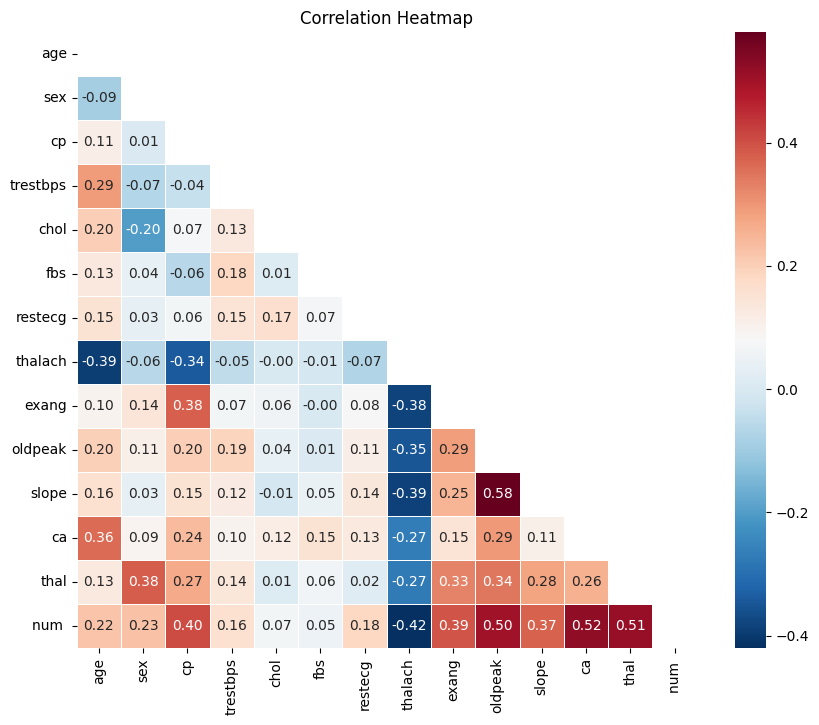

In [ ]:
# Setando o tamanho da figura
plt.figure(figsize=(10, 8))

# Criando o mapa de calor
sns.heatmap(corr_mat, mask=upper_corr_mat, annot=True, fmt=".2f", linewidths=0.5, cmap='RdBu_r')

#  Imprimindo
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Remoção do target para realização do agrupamento
df_old = df.copy()
df.drop(['num '], axis=1, inplace=True)

In [ ]:
df_old

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


### Tratamento dos Outliers

O tratamento dos outliers envolve a identificação e a correção de valores atípicos ou discrepantes em um conjunto de dados. Estes são pontos de dados que se desviam significativamente do restante do conjunto, podendo distorcer análises e modelos estatísticos. As abordagens para tratamento de outliers incluem removê-los, substituí-los por valores mais apropriados ou aplicar técnicas estatísticas para mitigar seu efeito.

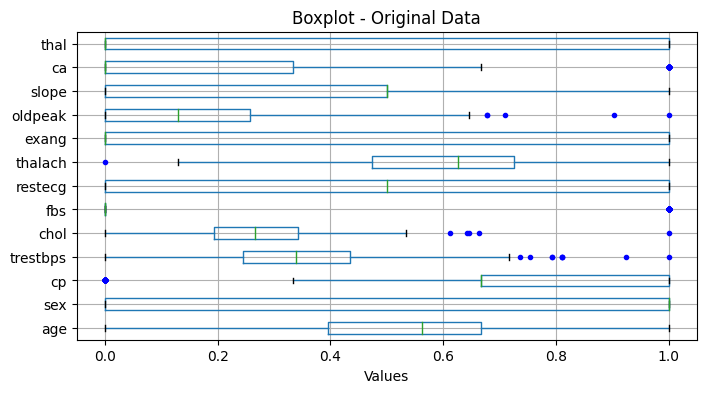

In [ ]:
# Copia o conjunto de dados para detecção do outlier
df_copy = df.copy()

# Faz a normalização para melhor plotagem dos box-splots
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_copy)
df_copy = pd.DataFrame(scaled_data, columns=df.columns)

# Define o limite para a detecção de outlier (e.g., Z-score > 3 ou Z-score < -3)
threshold = 3

# Calcula o Z-score para cada coluna do df
z_scores = np.abs(stats.zscore(df_copy))

# Cria a mask para idenfificar outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Indicies dos outliers
outlier_indices = outlier_mask.index[outlier_mask == True].tolist()

# Cria o boxplot para visualizar o df original
plt.figure(figsize=(8, 4))
df_copy.boxplot(sym='b.', vert=False)
plt.xlabel('Values')
plt.title('Boxplot - Original Data')
plt.show()

In [ ]:
# Exibindo os índicies e total de outliers encontrados
print("Índices dos outliers:", outlier_indices)
print("Total de outliers encontrados:", len(outlier_indices))

Índices dos outliers: [48, 90, 120, 122, 125, 151, 179, 186, 242]
Total de outliers encontrados: 9


## Normalização

A normalização é um processo de pré-processamento de dados que visa dimensionar os valores das variáveis para uma faixa específica, geralmente entre 0 e 1. Isso é feito para garantir que todas as variáveis tenham a mesma influência durante análises e modelagem estatística. A normalização é especialmente útil quando os dados têm escalas diferentes, o que pode levar a problemas em algoritmos sensíveis à escala, como o K-Means. Ao normalizar os dados, asseguramos que todas as variáveis contribuam igualmente para a análise, tornando-a mais justa e precisa.

In [ ]:
# Realizando a Normalização Min-Max dos dados

# Inicializando o StandardScaler
scaler = MinMaxScaler()

# Ajustando e transformando os dados utilizando o escalador
scaled_data = scaler.fit_transform(df)

# Ciando um novo DataFrame com os dados normalizados
mm_df = pd.DataFrame(scaled_data, columns=df.columns)

mm_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00
293,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
294,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
295,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00


In [ ]:
# Removendo os outliers dos dataframes

# Mantendo outlier para o HDBSCAN
mmo_df = mm_df.copy()

mm_df = mm_df.drop(outlier_indices)
mm_df.reset_index(inplace=True, drop=True)

df_old = df_old.drop(outlier_indices)
df_old.reset_index(inplace=True, drop=True)

In [ ]:
# Verificando se possuem mesma quantidade de tuplas
print(df.shape)
print(mm_df.shape)
print(df_old.shape)

(297, 13)
(288, 13)
(288, 14)


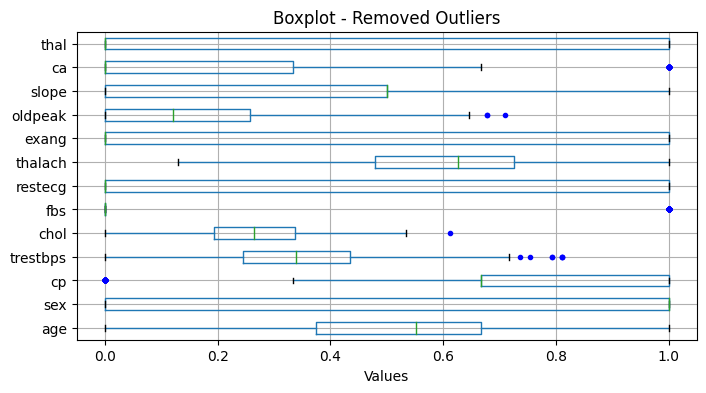

In [ ]:
# Visualização do df sem outliers
plt.figure(figsize=(8, 4))
mm_df.boxplot(sym='b.', vert=False)
plt.xlabel('Values')
plt.title('Boxplot - Removed Outliers')
plt.show()

# 4. Algoritmos de Clusterização


## 4.1 K-Means

O K-Means é um popular algoritmo de agrupamento, mais especificamente de paradigma particional, usado em análise de dados e aprendizado de máquina. Ele divide um conjunto de dados em clusters, onde os pontos de dados em cada cluster são mais similares entre si do que com os pontos de outros clusters. O "K" em K-Means representa o número de clusters que você deseja criar. O algoritmo funciona iterativamente, atribuindo pontos de dados a clusters com base na proximidade dos centroides (pontos centrais) e, em seguida, recalculando os centroides com base nos pontos atribuídos. Isso é repetido até que os clusters estejam estáveis.

### Método do "Cotovelo" (Elbow Method)

O método do "Cotovelo" envolve a execução repetida do algoritmo com um aumento no número de clusters, o score de agrupamento é calculado como uma função do número de clusters e apresentado no gráfico. O score é uma forma da razão entre a distância intracluster e a distância intercluster. O número ideal de clusters é determinado pela posição da "curva de cotovelo", ou seja, quando adicionar um novo cluster não melhora significativamente o modelo.

Primeiramente foi utilizada a regra do cotovelo para  verificar qual retornaria o melhor valor para WCSS sem que a classificação perdesse em desempenho. Entretanto, pode-se ver no plot a seguir que essa visualização não ficou tão clara para essa distribuição.

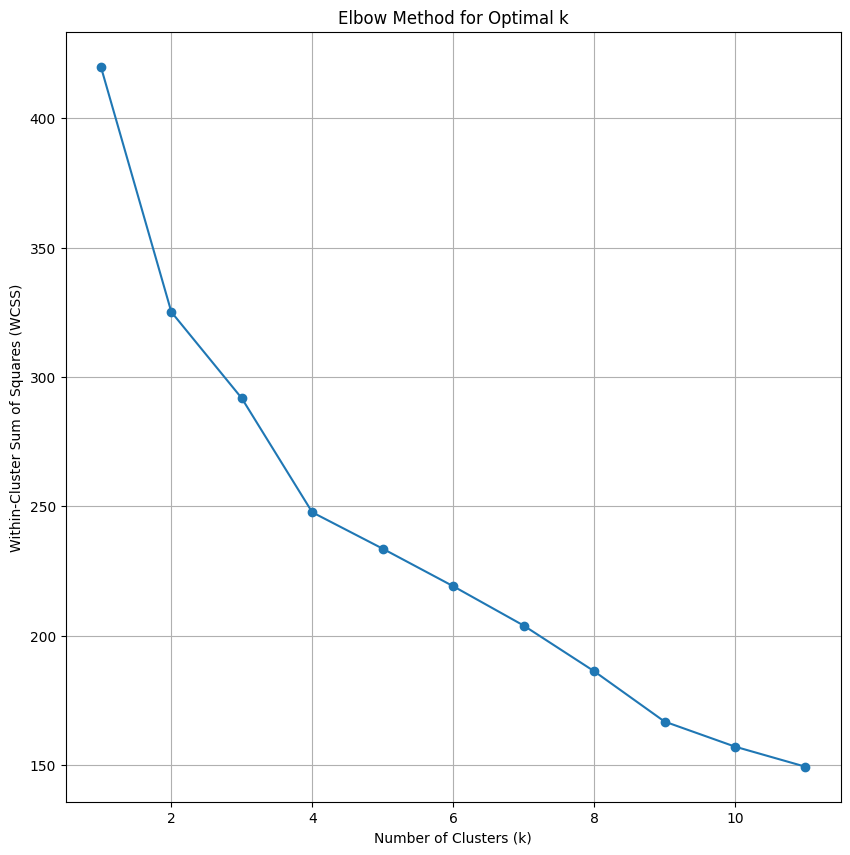

In [ ]:
# Defina um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
k_values = range(1, 12, 1)

# Inicializa uma lista para armazenar a soma dos quadrados dentro do cluster (WCSS) para cada k
wcss_values = []

# Calcula WCSS para cada valor k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(mm_df)
    wcss_values.append(kmeans.inertia_)

# Plota a curva do cotovelo
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Foi então criado um caso de testes para a regra do cotovelo aplicando também a PCA, em busca de um melhor desempenho. Apesar de alcançarmos uma melhora bastante considerável, optamos em continuar com alguns testes, pois quantidades baixas de componentes da PCA tornam escassa a explicabilidade do modelo, e com quantidades maiores, a regra do cotovelo continua não apontando um melhor resultado.

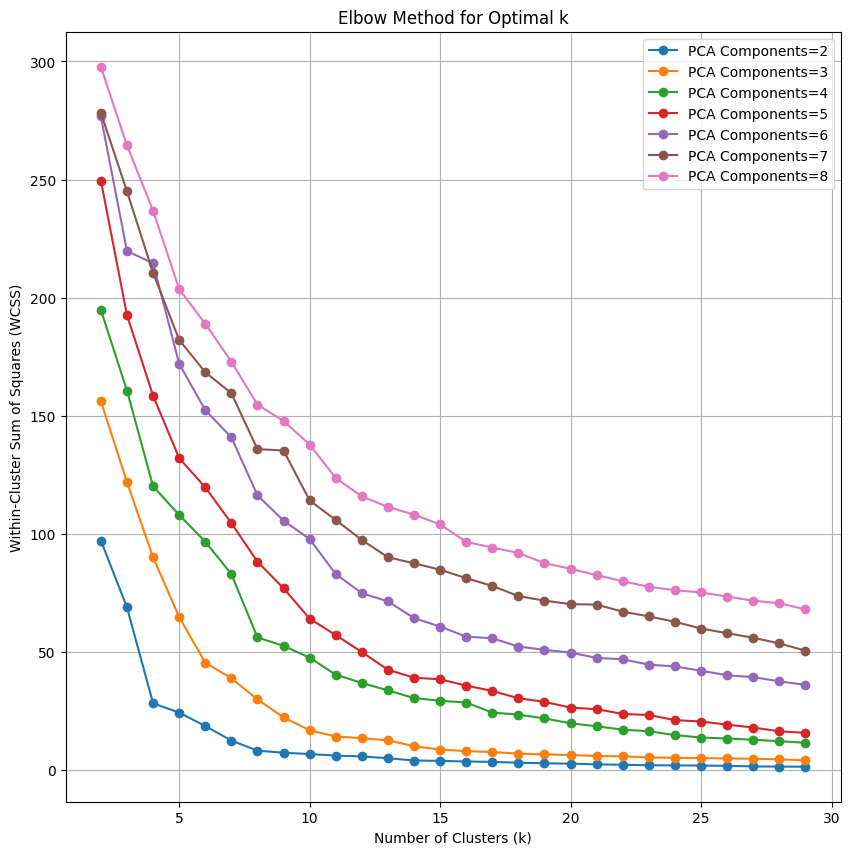

In [ ]:
# Define um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
k_values = range(2, 30, 1)
j_values = range(2, 9)

# Inicializa uma lista para armazenar a soma dos quadrados dentro do cluster (WCSS) para cada k
wcssj_values = []
silhouette_scores_df = pd.DataFrame(columns=k_values, index=j_values)

for j in j_values:
    wcss_values = []
    for k in k_values:
        # Inicializa o PCA com o número especificado de componentes
        pca = PCA(n_components=j)

        # Ajustar o PCA aos dados pré-processados
        pca.fit(mm_df)

        # Transforma os dados no espaço de menor dimensão
        pca_result = pca.transform(mm_df)

        kmeans = KMeans(n_clusters=k, init='k-means++',n_init='auto', random_state=42)
        kmeans_labels = kmeans.fit_predict(pca_result)
        silhouette_avg = silhouette_score(pca_result, kmeans_labels)
        silhouette_scores_df.loc[j, k] = silhouette_avg
        wcss_values.append(kmeans.inertia_)

    # Anexa a lista wcss_values à lista wcssj_values para cada valor de j
    wcssj_values.append(wcss_values)

# Plote a curva do cotovelo para cada valor de j
for j, wcss_values in zip(j_values, wcssj_values):
    plt.plot(k_values, wcss_values, marker='o', label=f'PCA Components={j}')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid(True)
plt.show()

Por isso, foi construído um heatmap para visualização da melhor distribuição em relação ao Silhuete Score e, a partir daí, podemos fazer alguns novos testes.

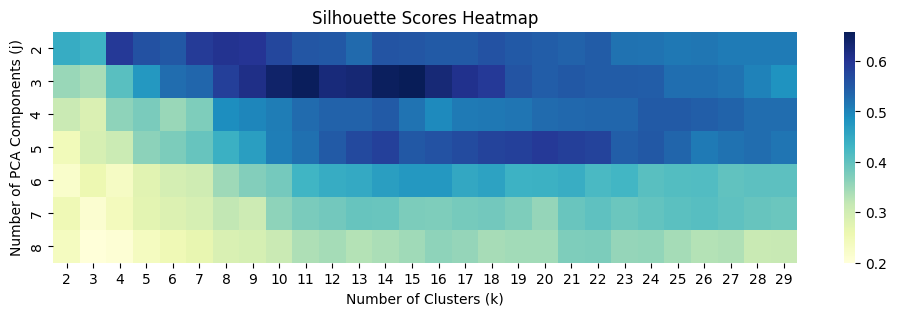

In [ ]:
silhouette_scores_df = silhouette_scores_df.astype('float64')

plt.figure(figsize=(12, 3))
sns.heatmap(silhouette_scores_df, cmap="YlGnBu")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Number of PCA Components (j)")
plt.title("Silhouette Scores Heatmap")
plt.show()

Com apenas 2 Componentes de PCA e 4 clusters por exemplo, podemos ver que alcançamos um score alto, assim como em 3 componentes de PCA e 15 clusters.

In [ ]:
# Inicializa o PCA com o número especificado de componentes
pca = PCA(n_components=3)

# Ajustar o PCA aos dados pré-processados
pca.fit(mm_df)

# Transforma os dados no espaço de menor dimensão
pca_result = pca.transform(mm_df)

# Defina um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
k_values = range(2, 100, 2)

# Defina um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
scores = {}

# Calcula WCSS para cada valor k=15
kmeans = KMeans(n_clusters=15, init='k-means++', n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)
scores[k] = silhouette_score(pca_result, kmeans_labels)
print("Scores for k values: ")
scores

Scores for k values: 


{29: 0.658130791459525}

In [ ]:
# Exibindo as componentes do PCA
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=mm_df.columns)

loadings_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.057031,0.437825,0.219099,0.026831,0.001488,0.055803,0.182042,-0.123858,0.495851,0.127175,0.185836,0.180262,0.612916
1,0.068331,-0.183357,0.028468,0.043384,0.036379,0.050483,0.934502,-0.029603,0.056090,0.019552,0.078301,0.047434,-0.262804
2,0.057824,-0.655506,0.296711,0.008158,0.035534,-0.137253,-0.223044,-0.114707,0.603345,0.047791,0.115767,0.016344,-0.126011


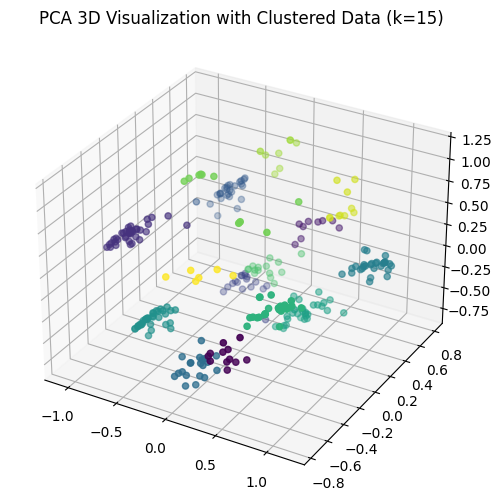

In [ ]:
num_clusters = 15

# Criar agrupamento K-means
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans_labels = kmeans.fit_predict(pca_result)

# Visualização de PCA 3D e dados agrupados
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_title('PCA 3D Visualization with Clustered Data (k={})'.format(num_clusters))
plt.show()

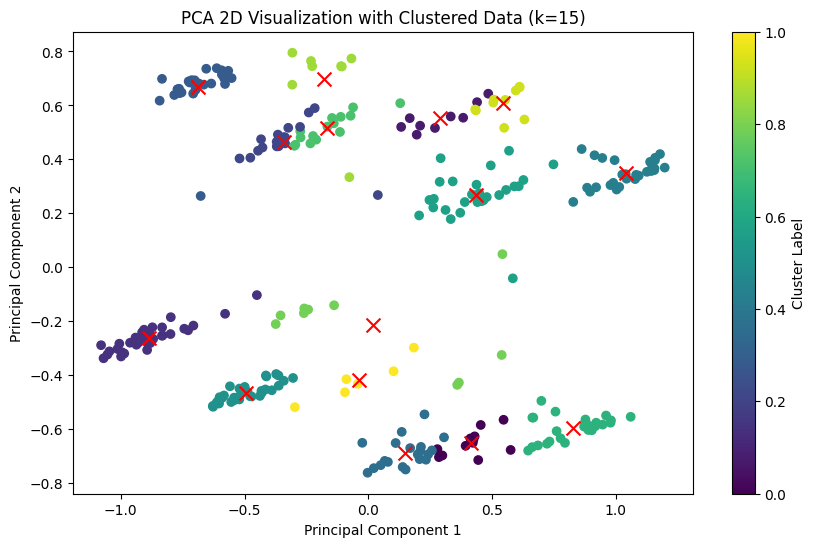

In [ ]:
# Visualização de PCA 2D e dados agrupados
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Visualization with Clustered Data (k={})'.format(num_clusters))
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Visualização de PCA 3D e dados agrupados usando plotly
fig = px.scatter_3d(x=pca_result[:, 0], y=pca_result[:, 1], z=pca_result[:, 2],
                    color=kmeans_labels, color_continuous_scale='viridis')
fig.update_layout(scene=dict(xaxis_title='Custom X Label',
                             yaxis_title='Custom Y Label',
                             zaxis_title='Custom Z Label'),
                             title='PCA 3D Visualization with Clustered Data (k={})'.format(num_clusters))
fig.show()

### Testando para um menor número de grupos

In [ ]:
# Inicializa o PCA com o número especificado de componentes
pca = PCA(n_components=2)

# Ajustar o PCA aos dados pré-processados
pca.fit(mm_df)

# Transforma os dados no espaço de menor dimensão
pca_result = pca.transform(mm_df)

# Defina um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
k_values = range(2, 100, 2)

# Defina um intervalo de valores k possíveis para tentar (por exemplo, de 1 a 10)
scores = {}

# Calcula WCSS para cada valor k=4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)
scores[k] = silhouette_score(pca_result, kmeans_labels)
print("Scores for k values: ")
scores

Scores for k values: 


{29: 0.5935955243080694}

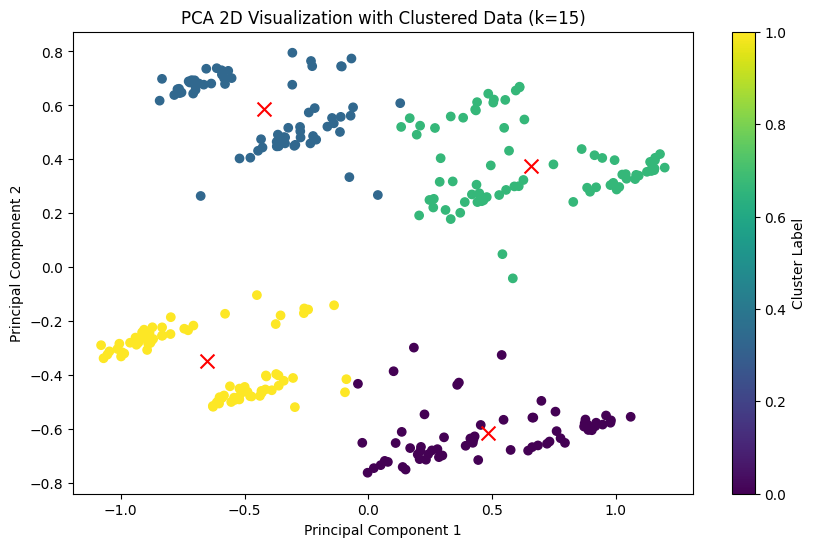

In [ ]:
# Visualização de PCA 2D e dados agrupados
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Visualization with Clustered Data (k={})'.format(num_clusters))
plt.colorbar(label='Cluster Label')
plt.show()

## 4.2 Aglomerativo


**Algoritmo Aglomerativo** é capaz de realizar um aninhamento de partições bottom up (começa a partir dos pontos únicos), em que todos os pontos são suas próprias "classes"
- A aglomeração ocorre conforme os grupos são mais próximos, caso haja empate os grupos serão conectados na mesma altura
- É um algoritmo que faz parte do paradigma hierarquico, que trata-se de uma sequência lógica de partições aninhadas
- Ótima alternativa para representar a distância em linha reta entre os dados. Por isso, é bom para apresentar visualmente  dados de dimensões maiores
- Também sugere outliers.

In [ ]:
# Função auxiliar para plotar os dendrogramas
def plot_dendogram(model,linkage_):
  from scipy.cluster.hierarchy import dendrogram,linkage
  X = model.children_
  n = model.n_clusters_
  Z = linkage(X, linkage_)
  dn = dendrogram(Z)
  plt.title(f"Dendograma do algoritmo aglomerativo, com n_cluster = {n} e linkage = {linkage_}",fontsize=50)
  plt.show()

In [ ]:
# Função auxiliar para plotar os gráficos de silhueta
def plot_sil_score(X,Y,title, x_label):
  plt.plot(X,Y,marker='o',color='black',linestyle='dashed')
  plt.title(title,fontsize=13)
  plt.xlabel(x_label,fontsize=13)
  plt.ylabel('Score Silhueta',fontsize=13)
  plt.show()

In [ ]:
#Importando o AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

A função utilizada para determinar a distância entre dois clusters para decidir quais grupos já formados devem ser combinados, conhecida como função de ligação, é o que diferencia os métodos de agrupamento aglomerativo.
Utilizamos três dessas formas:

- Nessa etapa, o algoritmo aglomerativo irá ser testado com várias configurações possíveis para calcular a dissimilaridade de grupos já formados
- O numero de clusters será testado de 2 à 7 e serão utilizadas 3 tipos de ligações diferentes (simples, completa e média)

In [ ]:
linkage = ['single','complete', 'average', ]
n_clust = [2,3,4,5,6,7]

### Ligação Simples

Funciona com base na menor distância entre todos os pontos dos clusters. Este método tende a produzir clusters longos e finos nos quais os elementos próximos do mesmo cluster têm pequenas distâncias, mas os elementos nas extremidades opostas de um cluster podem estar muito mais distantes um do outro do que dois elementos de outros clusters.

Para algumas classes de dados, isso pode levar a dificuldades na definição de classes que possam subdividir os dados de maneira útil. Também é conhecido como o algoritmo dos amigos dos amigos e é sensível a ruídos contínuos



#### Com dados normalizados

Utilizando a normalização Min Max e sem a presença de outliers para aplicar o algoritmo aglomerativo com Ligação Simples

In [ ]:
sc = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg = AgglomerativeClustering(n_clusters=i,linkage=linkage[0],metric='euclidean',compute_distances=True)
  preds = agg.fit_predict(mmo_df)
  score = silhouette_score(mmo_df, preds)
  sc.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[0]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = single, o valor do índice de silhueta é  0.1874510217837328
Para n_clusters = 3 e linkage = single, o valor do índice de silhueta é  0.05744946419110255
Para n_clusters = 4 e linkage = single, o valor do índice de silhueta é  0.042397787053869186
Para n_clusters = 5 e linkage = single, o valor do índice de silhueta é  -0.031597609251572706
Para n_clusters = 6 e linkage = single, o valor do índice de silhueta é  -0.042580953431388166
Para n_clusters = 7 e linkage = single, o valor do índice de silhueta é  -0.045064375648010024


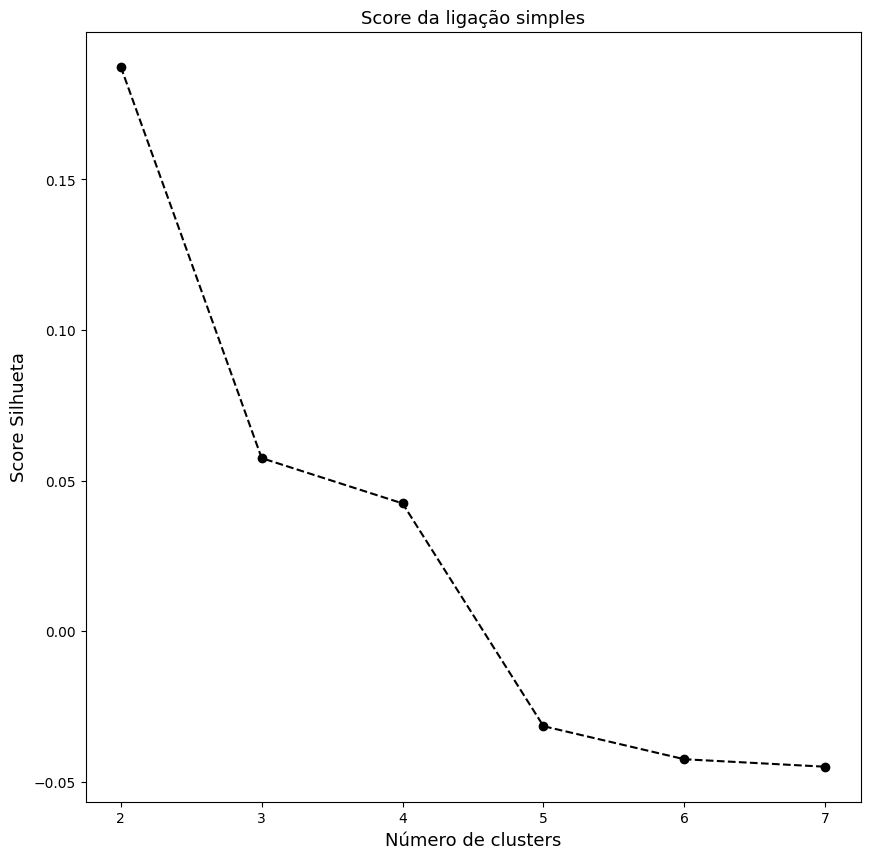

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc,'Score da ligação simples','Número de clusters')

Como pode ser visto, obteve-se um baixo score de 0.187 para 2 clusters.

A seguir, o dendograma gerado do algoritmo:

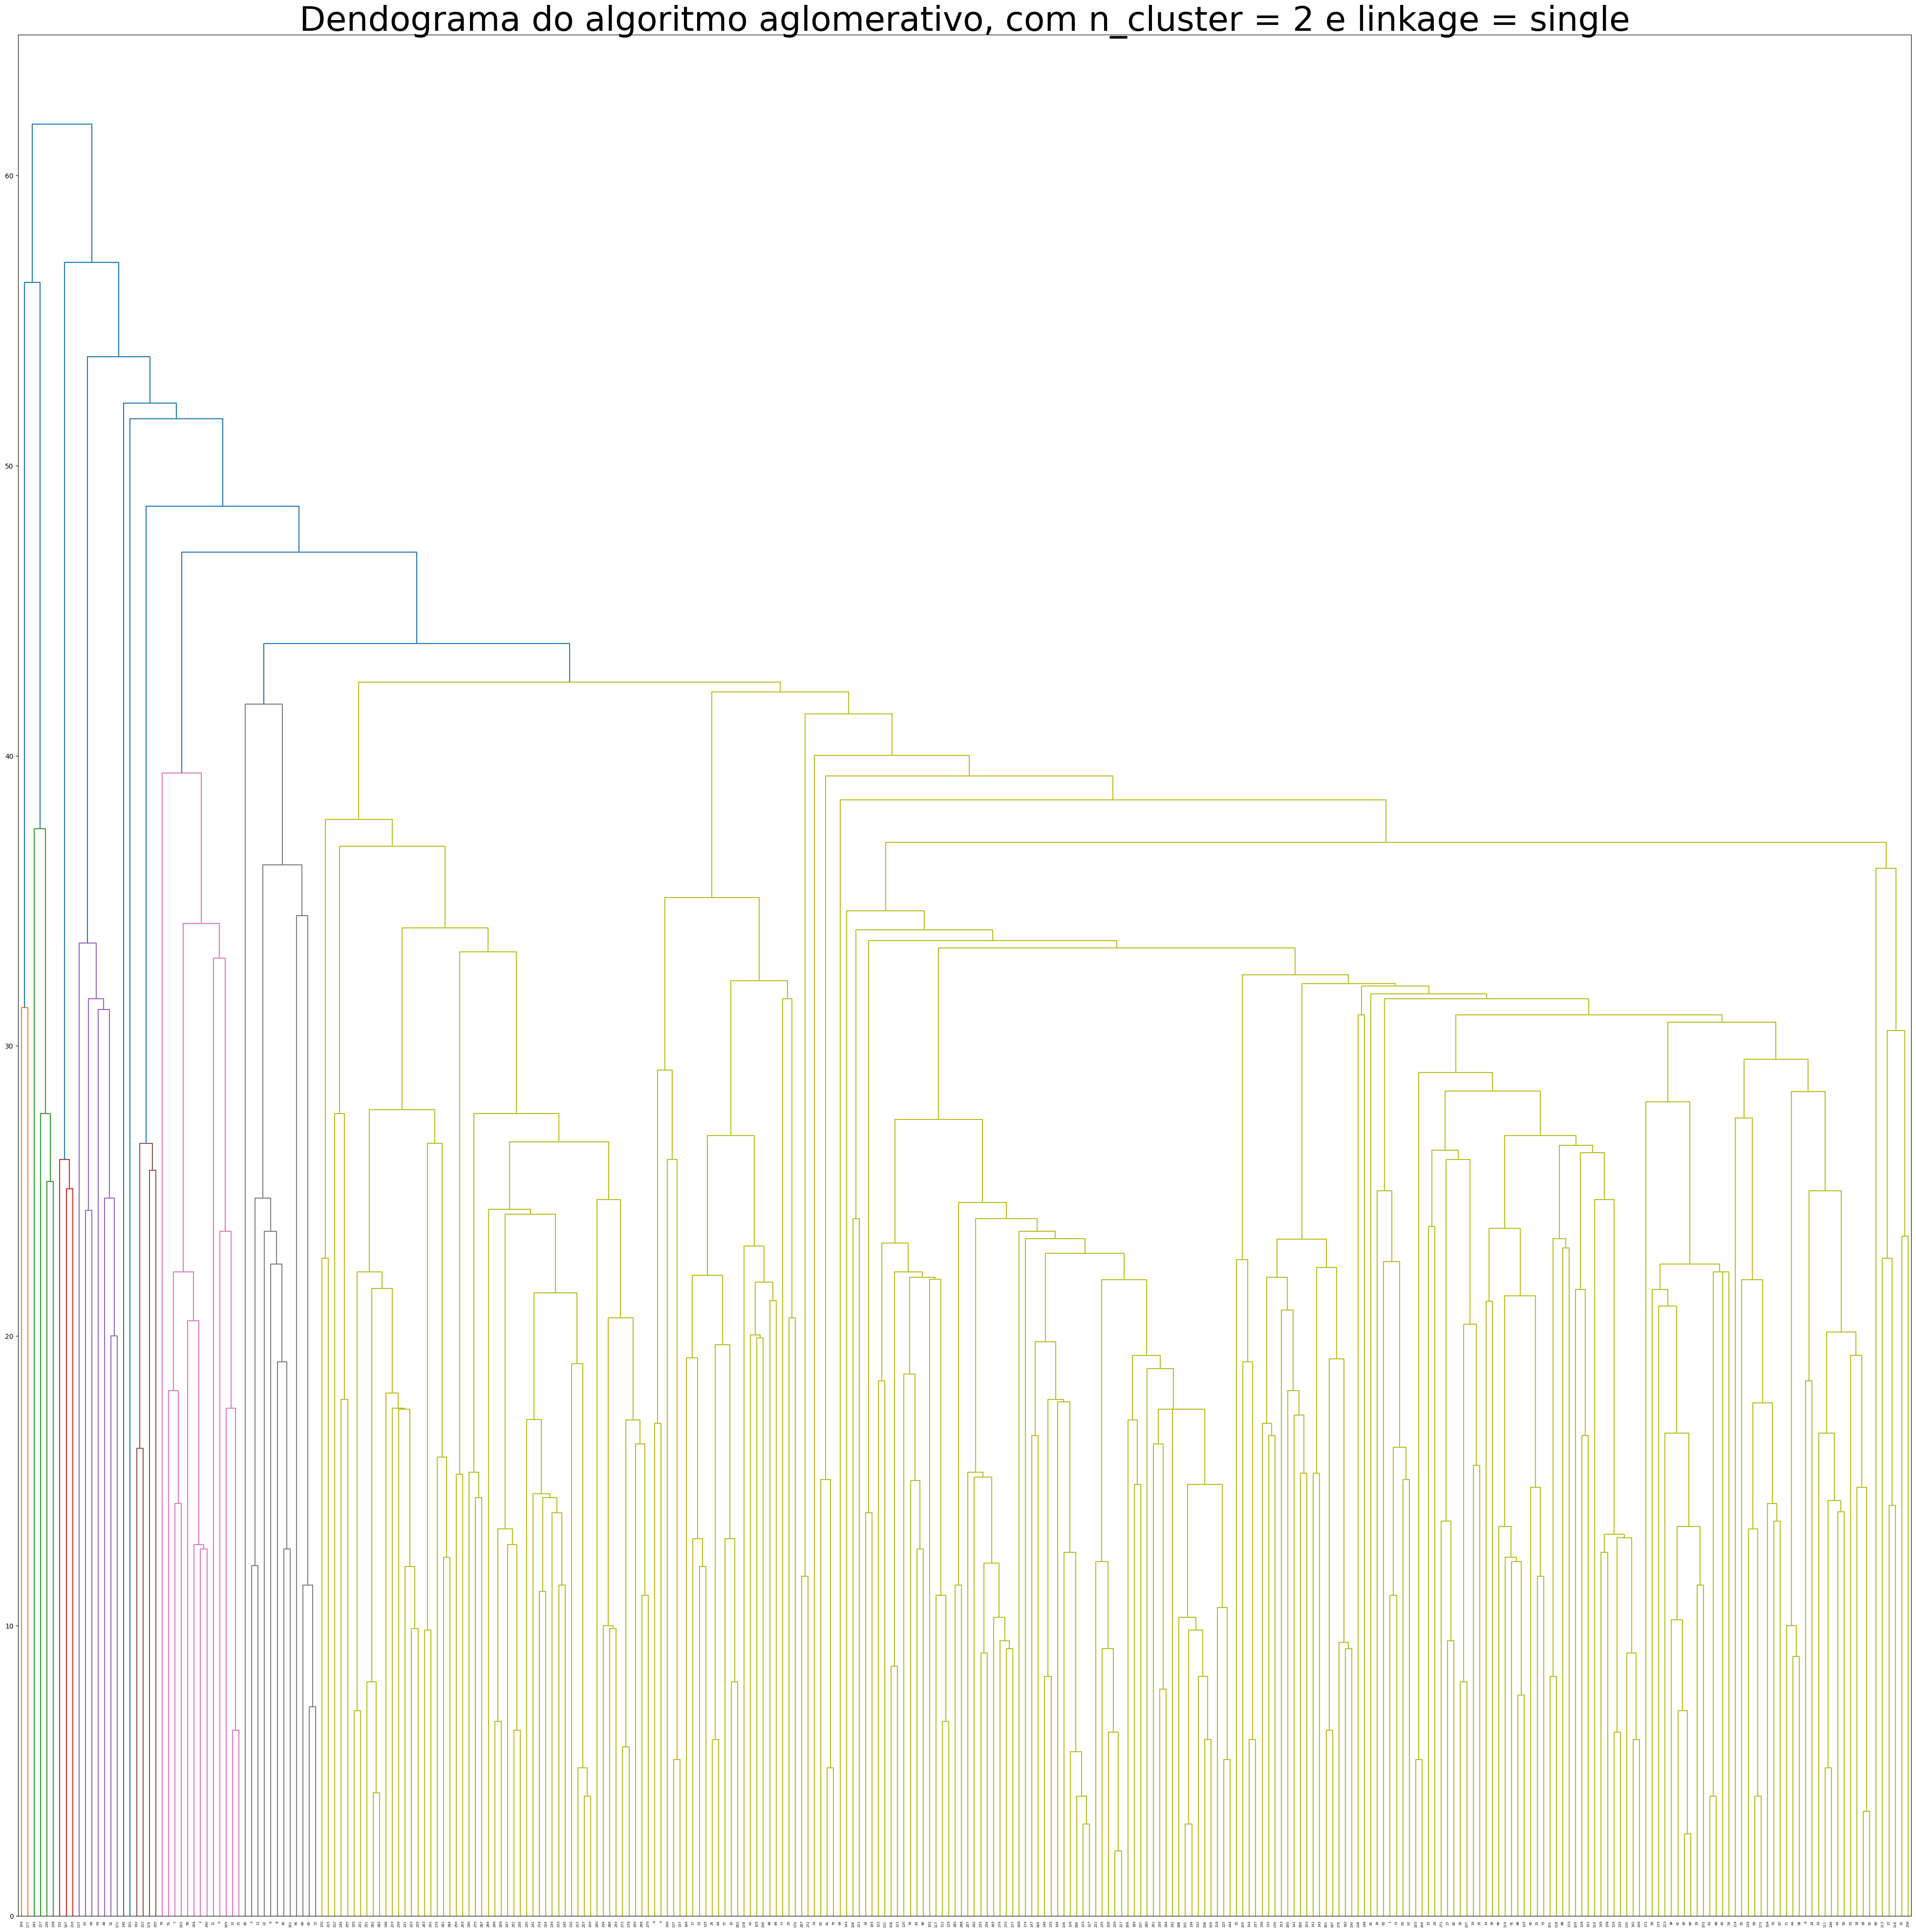

In [ ]:
plt.rcParams["figure.figsize"] = (50,50)
agg = AgglomerativeClustering(n_clusters=2,linkage=linkage[0],metric='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg,linkage[0])

#### Com dados não normalizados e com outliers

In [ ]:
sc = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg = AgglomerativeClustering(n_clusters=i,linkage=linkage[0],metric='euclidean',compute_distances=True)
  preds = agg.fit_predict(df)
  score = silhouette_score(df, preds)
  sc.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[0]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = single, o valor do índice de silhueta é  0.7599908172680998
Para n_clusters = 3 e linkage = single, o valor do índice de silhueta é  0.24264507343618338
Para n_clusters = 4 e linkage = single, o valor do índice de silhueta é  0.15110003103755376
Para n_clusters = 5 e linkage = single, o valor do índice de silhueta é  0.16953916104247546
Para n_clusters = 6 e linkage = single, o valor do índice de silhueta é  0.1147023364006939
Para n_clusters = 7 e linkage = single, o valor do índice de silhueta é  0.08138591259772697


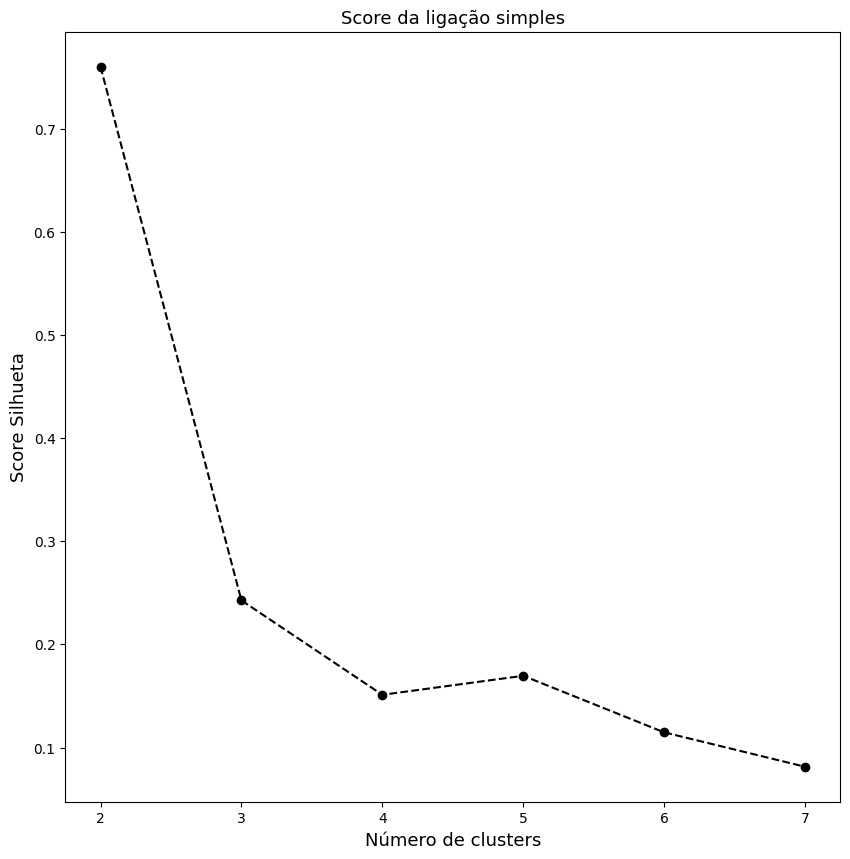

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc,'Score da ligação simples','Número de clusters')

Como pode ser visto, obteve-se um bom score de 0.76 para 2 clusters.

A seguir, o dendograma gerado do algoritmo:

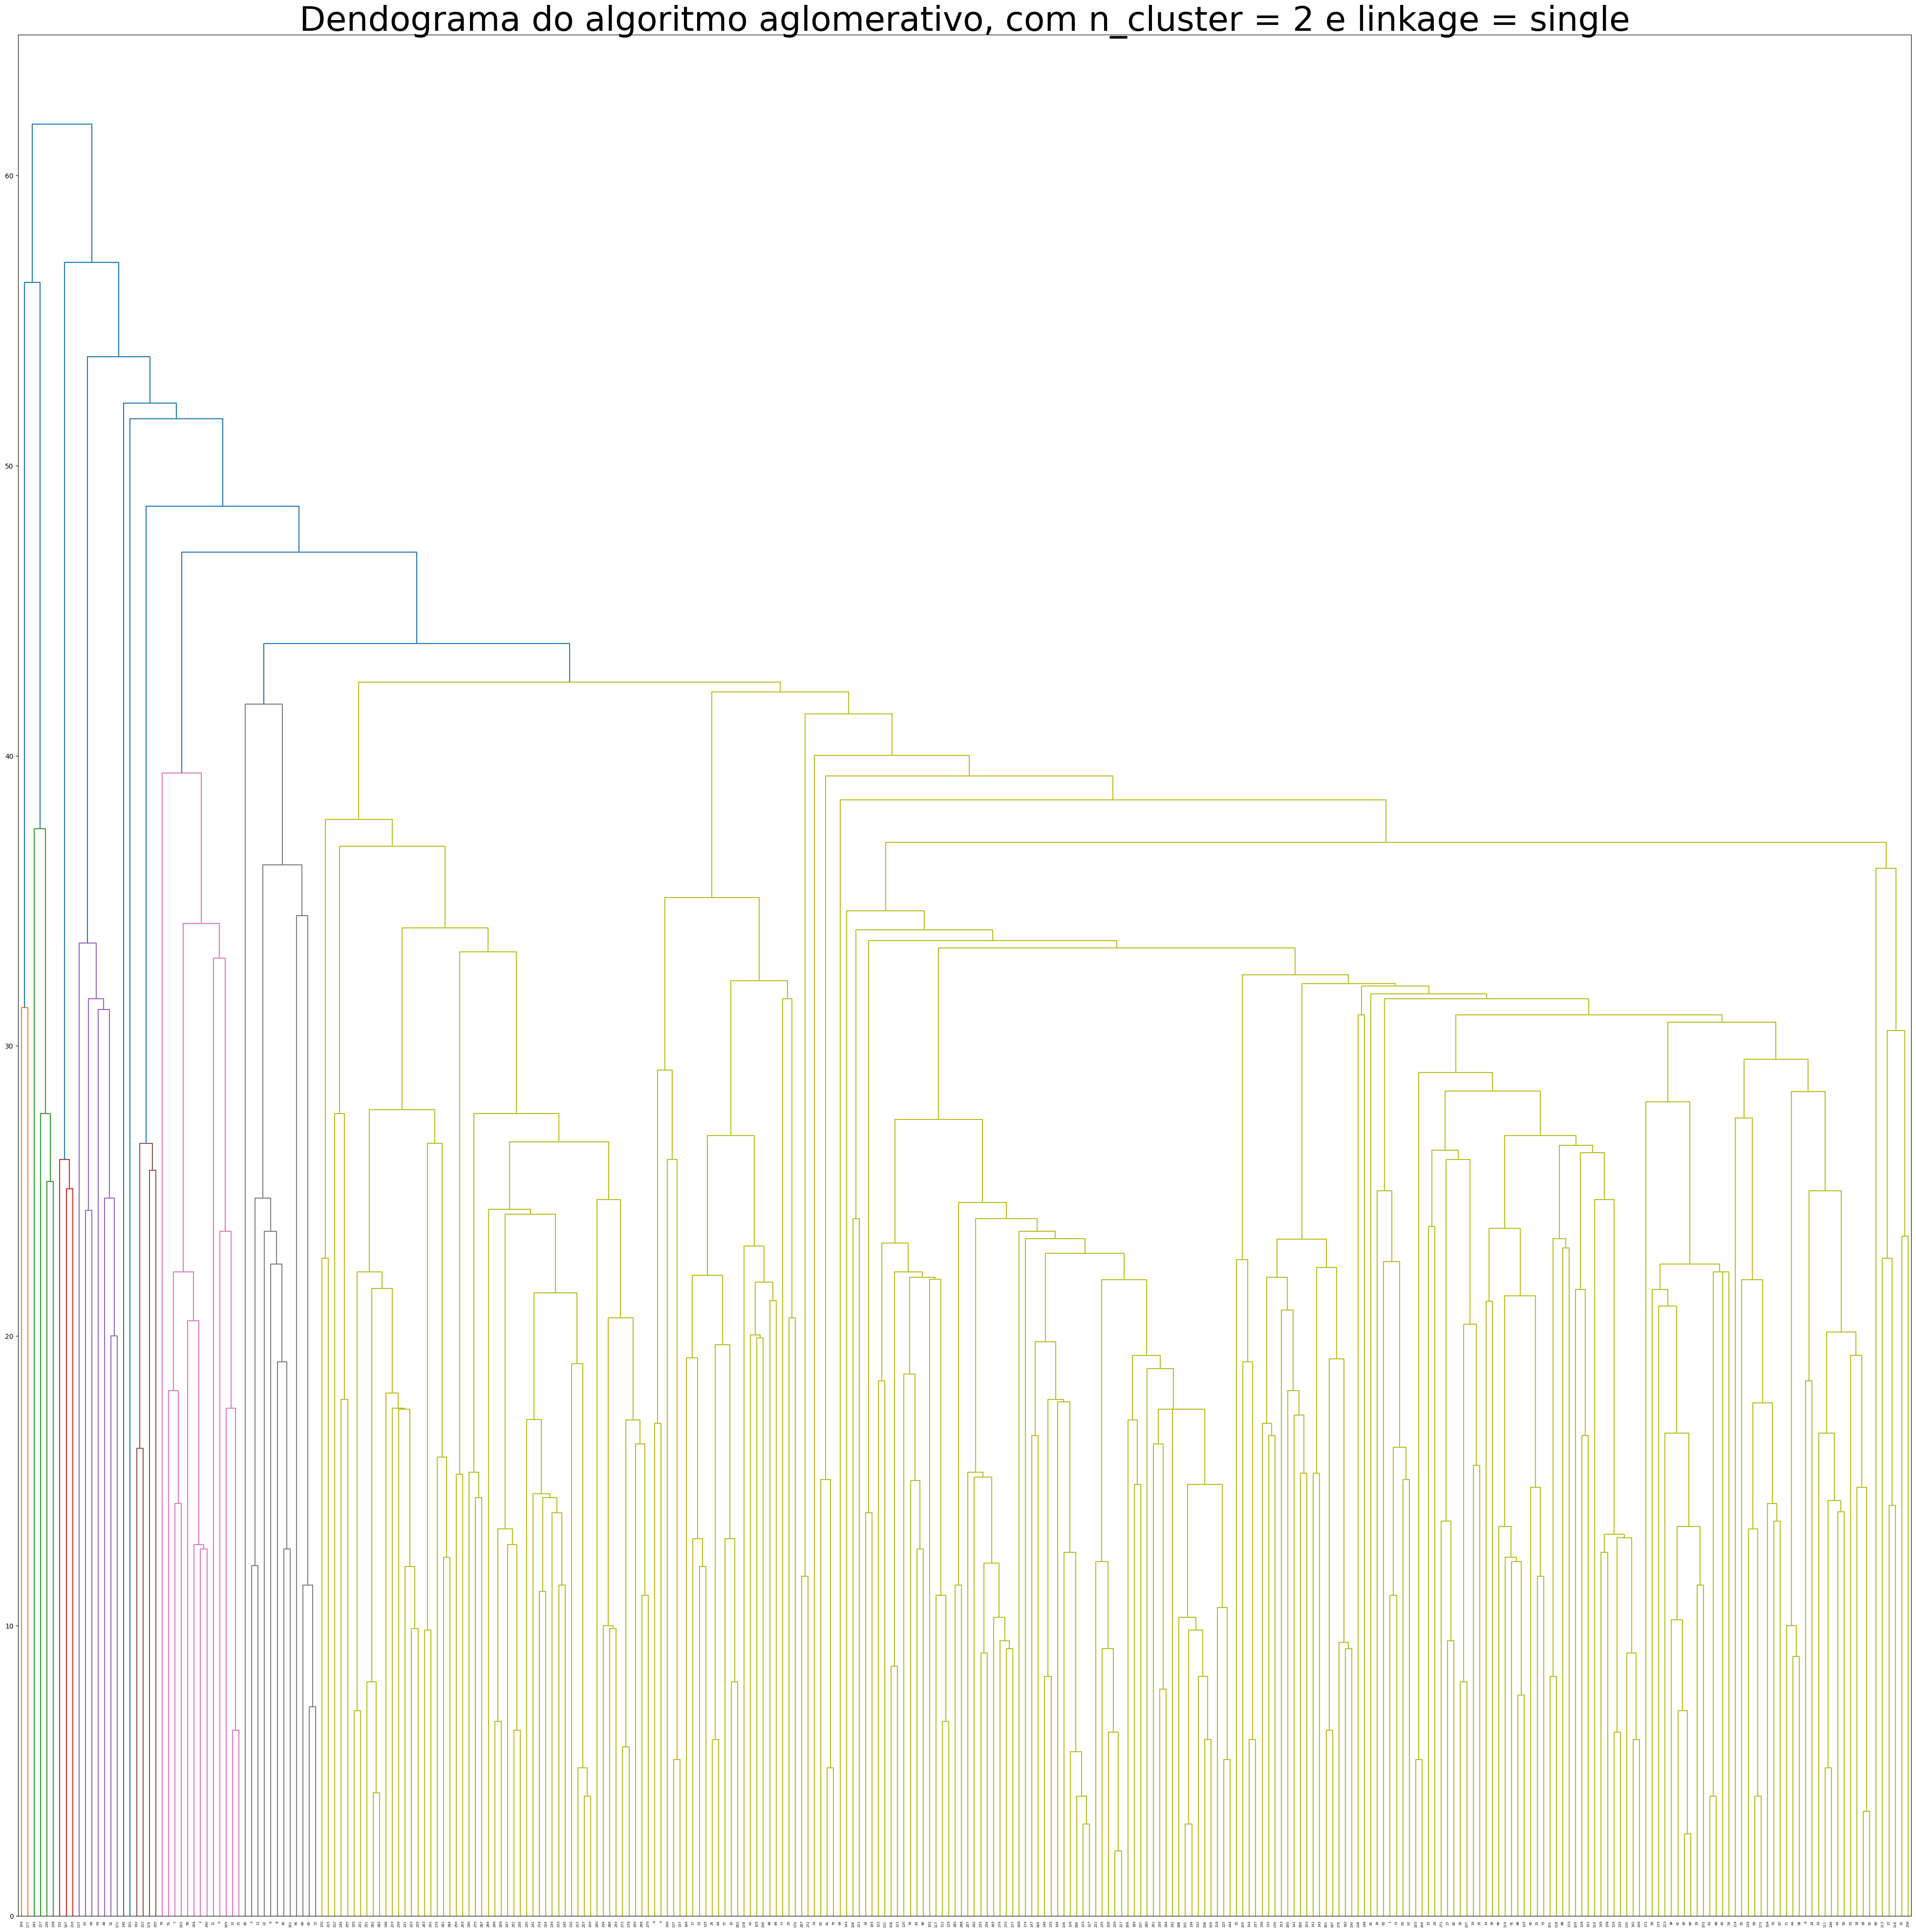

In [ ]:
plt.rcParams["figure.figsize"] = (50,50)
agg = AgglomerativeClustering(n_clusters=2,linkage=linkage[0],metric='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg,linkage[0])

### Ligação Completa

Avalia a maior distância entre os pontos de dois grupos e escolhe o resultado menor desse tipo. É uma técnica mais robusta a ruído e outliers, pois são absorvidos logo no começo.

No clustering de ligação completa, o link entre dois clusters contém todos os pares de elementos, e a distância entre os clusters é igual à distância entre os dois elementos (um em cada cluster) que estão mais distantes um do outro. O mais curto desses links que permanece em qualquer etapa causa a fusão dos dois clusters cujos elementos estão envolvidos.

#### Com dados normalizados

Utilizando a normalização Min Max e sem a presença de outliers para aplicar o algoritmo aglomerativo com Ligação Completa

In [ ]:
sc2 = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg2 = AgglomerativeClustering(n_clusters=i,linkage=linkage[1],metric='euclidean',compute_distances=True)
  preds = agg2.fit_predict(mmo_df)
  score = silhouette_score(mmo_df, preds)
  sc2.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[1]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = complete, o valor do índice de silhueta é  0.13763763974451582
Para n_clusters = 3 e linkage = complete, o valor do índice de silhueta é  0.1815692299636734
Para n_clusters = 4 e linkage = complete, o valor do índice de silhueta é  0.16476474696559879
Para n_clusters = 5 e linkage = complete, o valor do índice de silhueta é  0.1634861747434909
Para n_clusters = 6 e linkage = complete, o valor do índice de silhueta é  0.1590571133530161
Para n_clusters = 7 e linkage = complete, o valor do índice de silhueta é  0.17051961585205588


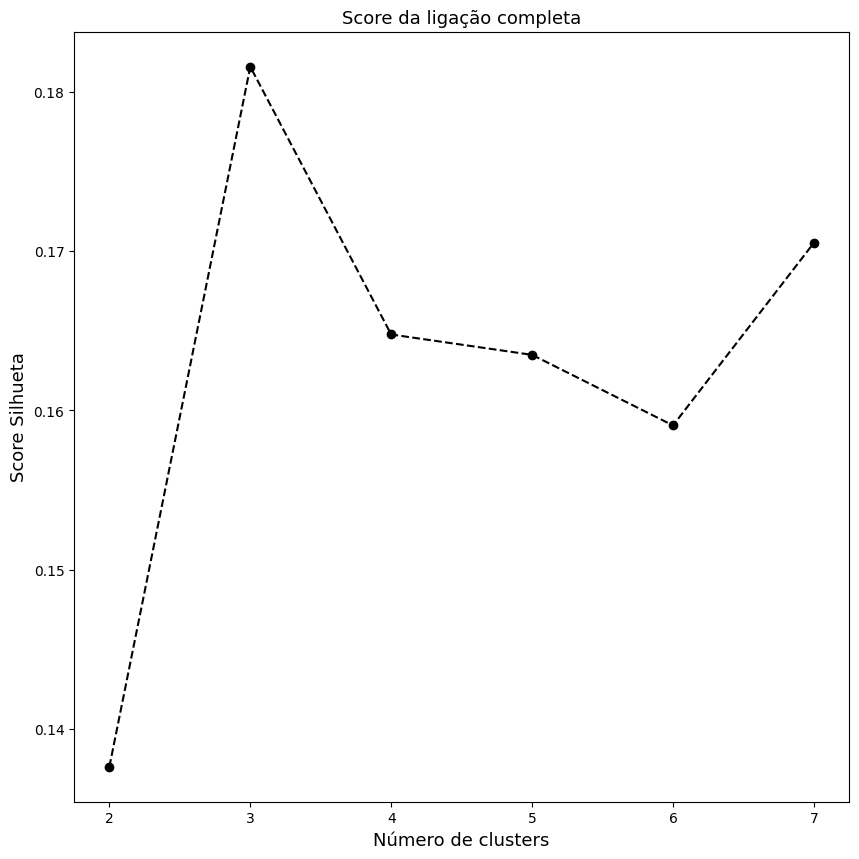

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc2,'Score da ligação completa', 'Número de clusters')

Como pode ser visto, obteve-se um baixo score de 0.187 para 2 clusters.

A seguir, o dendograma gerado do algoritmo:

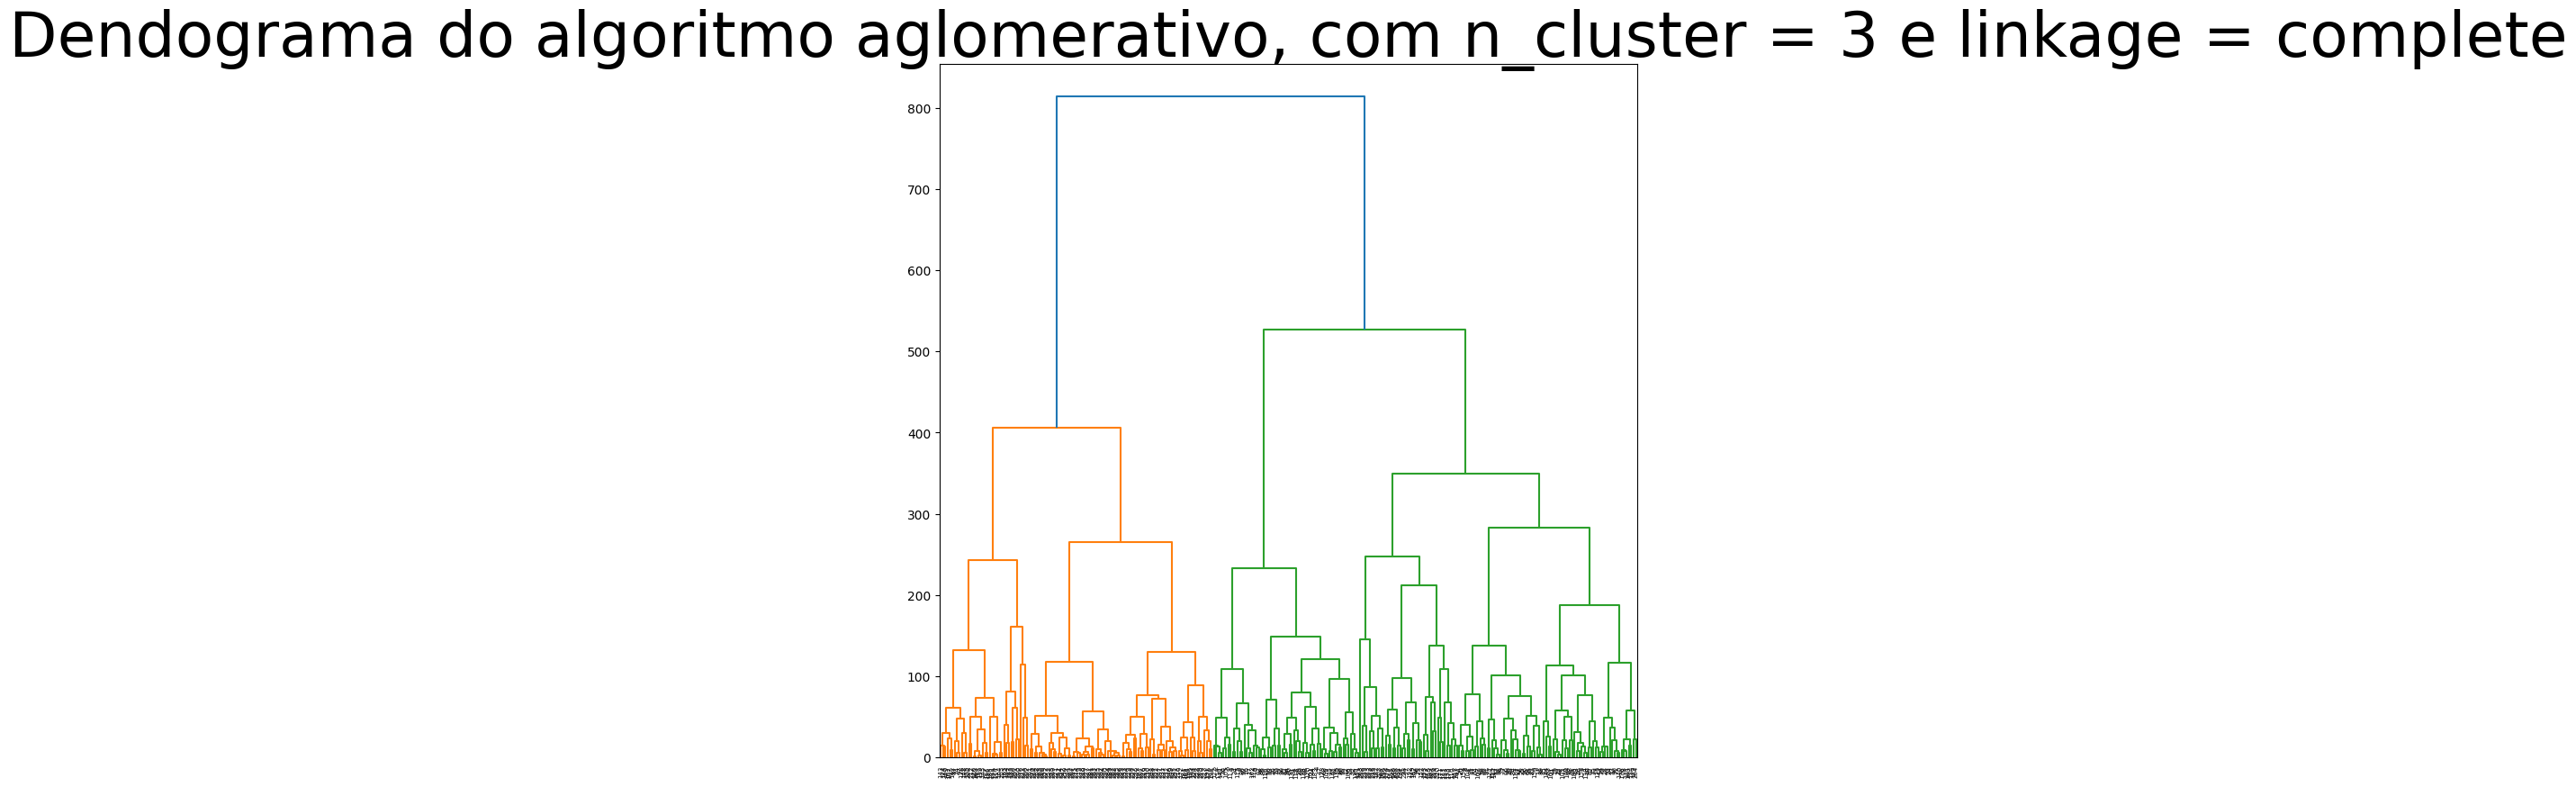

In [ ]:
agg2 = AgglomerativeClustering(n_clusters=3,linkage=linkage[1],metric='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg2,linkage[1])

#### Com dados não normalizados e com outliers

In [ ]:
sc2 = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg2 = AgglomerativeClustering(n_clusters=i,linkage=linkage[1],metric='euclidean',compute_distances=True)
  preds = agg2.fit_predict(df)
  score = silhouette_score(df, preds)
  sc2.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[1]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = complete, o valor do índice de silhueta é  0.6191309962384088
Para n_clusters = 3 e linkage = complete, o valor do índice de silhueta é  0.3627593418570134
Para n_clusters = 4 e linkage = complete, o valor do índice de silhueta é  0.3497774749839016
Para n_clusters = 5 e linkage = complete, o valor do índice de silhueta é  0.2560975808673663
Para n_clusters = 6 e linkage = complete, o valor do índice de silhueta é  0.19230014843435675
Para n_clusters = 7 e linkage = complete, o valor do índice de silhueta é  0.15770713766188948


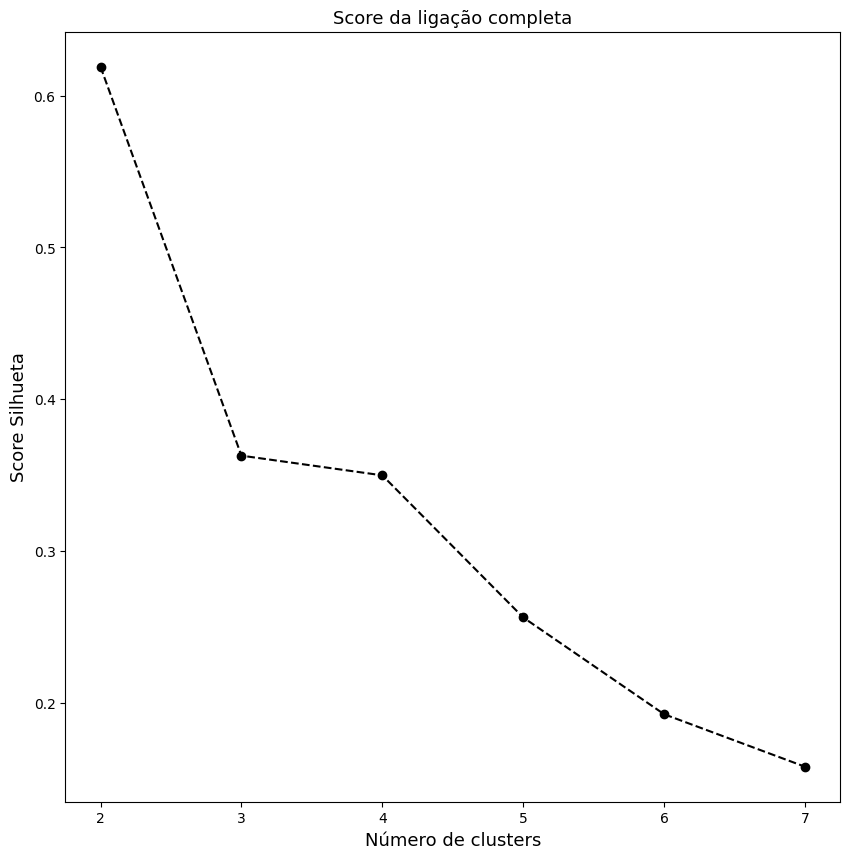

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc2,'Score da ligação completa', 'Número de clusters')

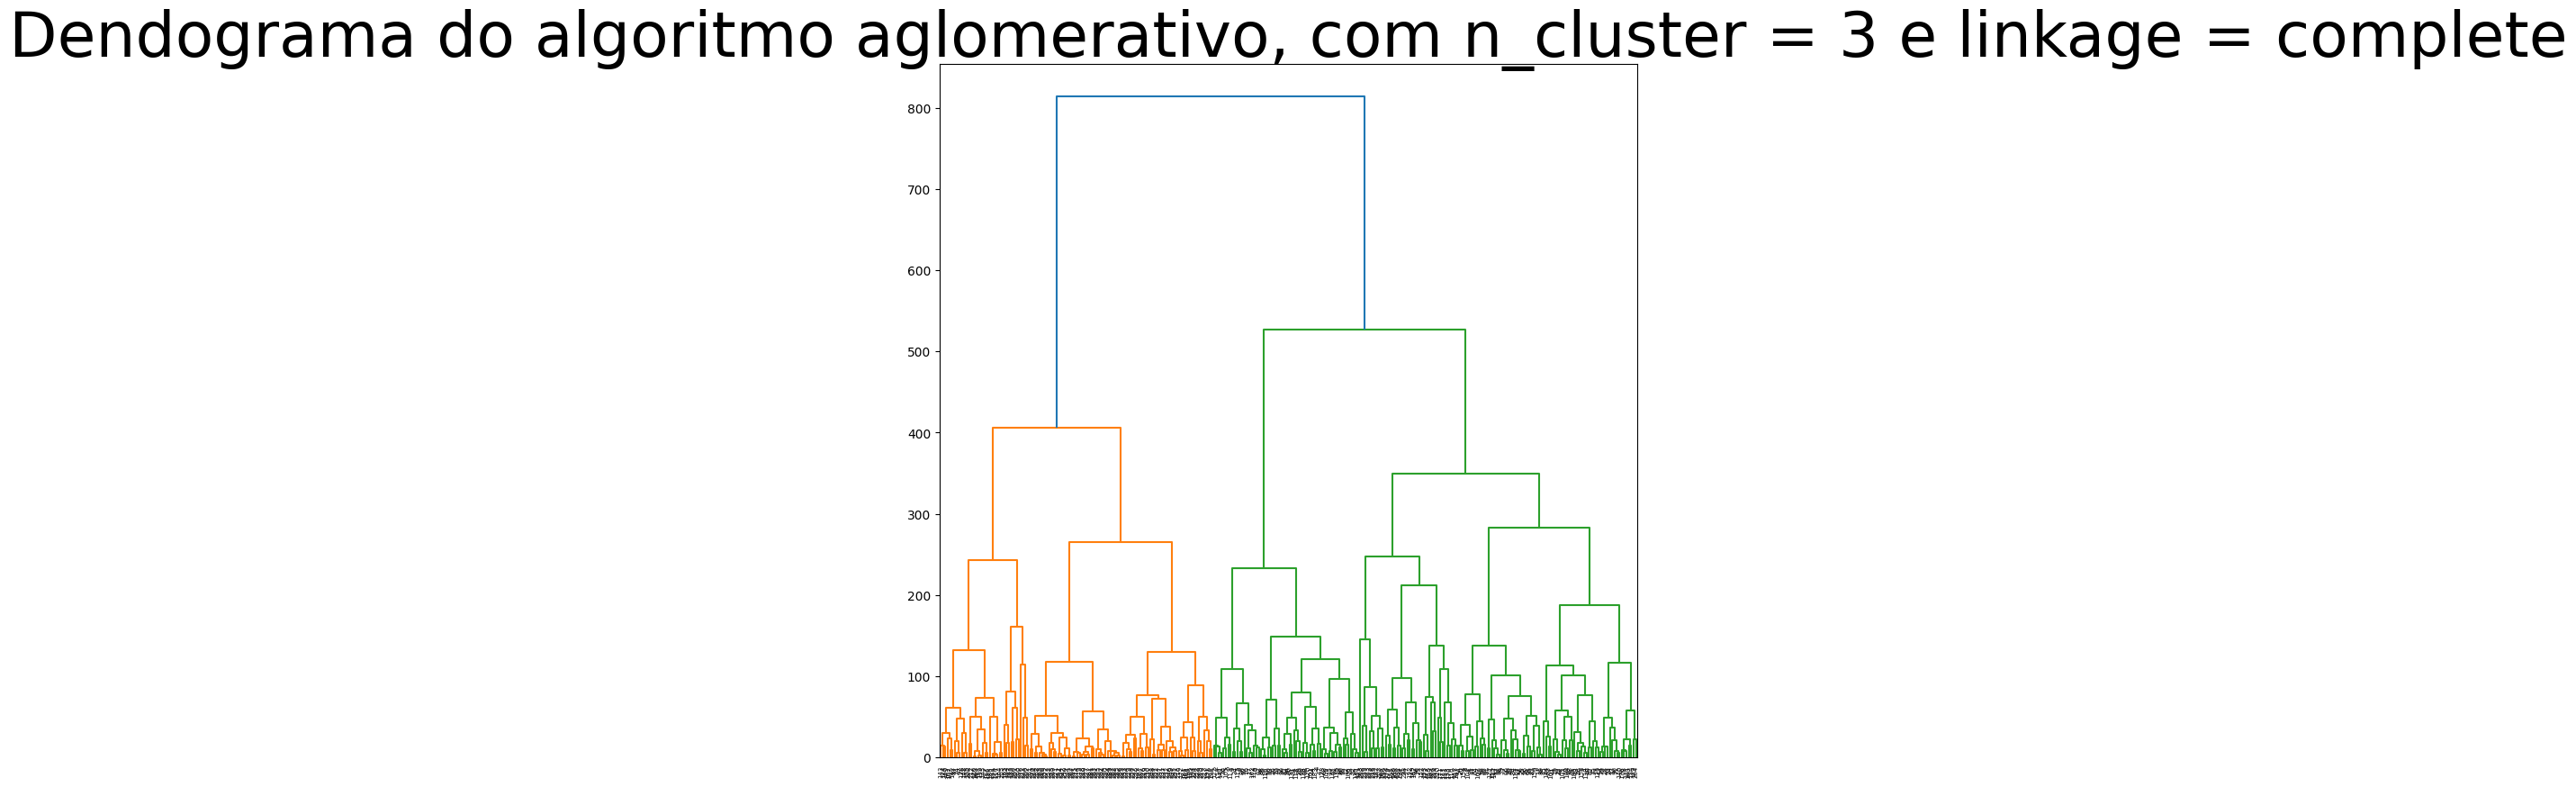

In [ ]:
agg2 = AgglomerativeClustering(n_clusters=3,linkage=linkage[1],metric='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg2,linkage[1])

### Ligação Média

A distância entre dois clusters é considerada a distância média entre os elementos de cada cluster. Todas as distâncias contribuem igualmente para cada média calculada, diferentemente da Ligação Média Ponderada.



#### Com dados normalizados

Utilizando a normalização Min Max e sem a presença de outliers para aplicar o algoritmo aglomerativo com Ligação Média

In [ ]:
sc3 = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg3 = AgglomerativeClustering(n_clusters=i,linkage=linkage[2],metric='euclidean',compute_distances=True)
  preds = agg3.fit_predict(mmo_df)
  score = silhouette_score(mmo_df, preds)
  sc3.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[2]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = average, o valor do índice de silhueta é  0.19098924842481504
Para n_clusters = 3 e linkage = average, o valor do índice de silhueta é  0.15402183836005795
Para n_clusters = 4 e linkage = average, o valor do índice de silhueta é  0.16876101856719553
Para n_clusters = 5 e linkage = average, o valor do índice de silhueta é  0.17127419203973215
Para n_clusters = 6 e linkage = average, o valor do índice de silhueta é  0.16204402622908454
Para n_clusters = 7 e linkage = average, o valor do índice de silhueta é  0.18940480599844026


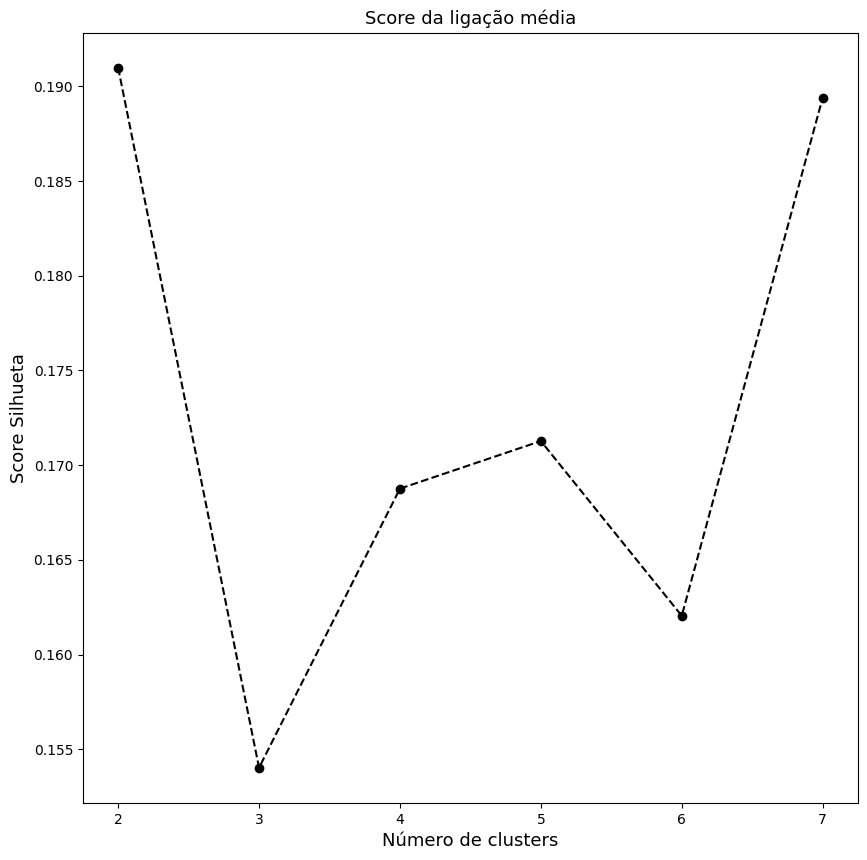

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc3,'Score da ligação média', 'Número de clusters')

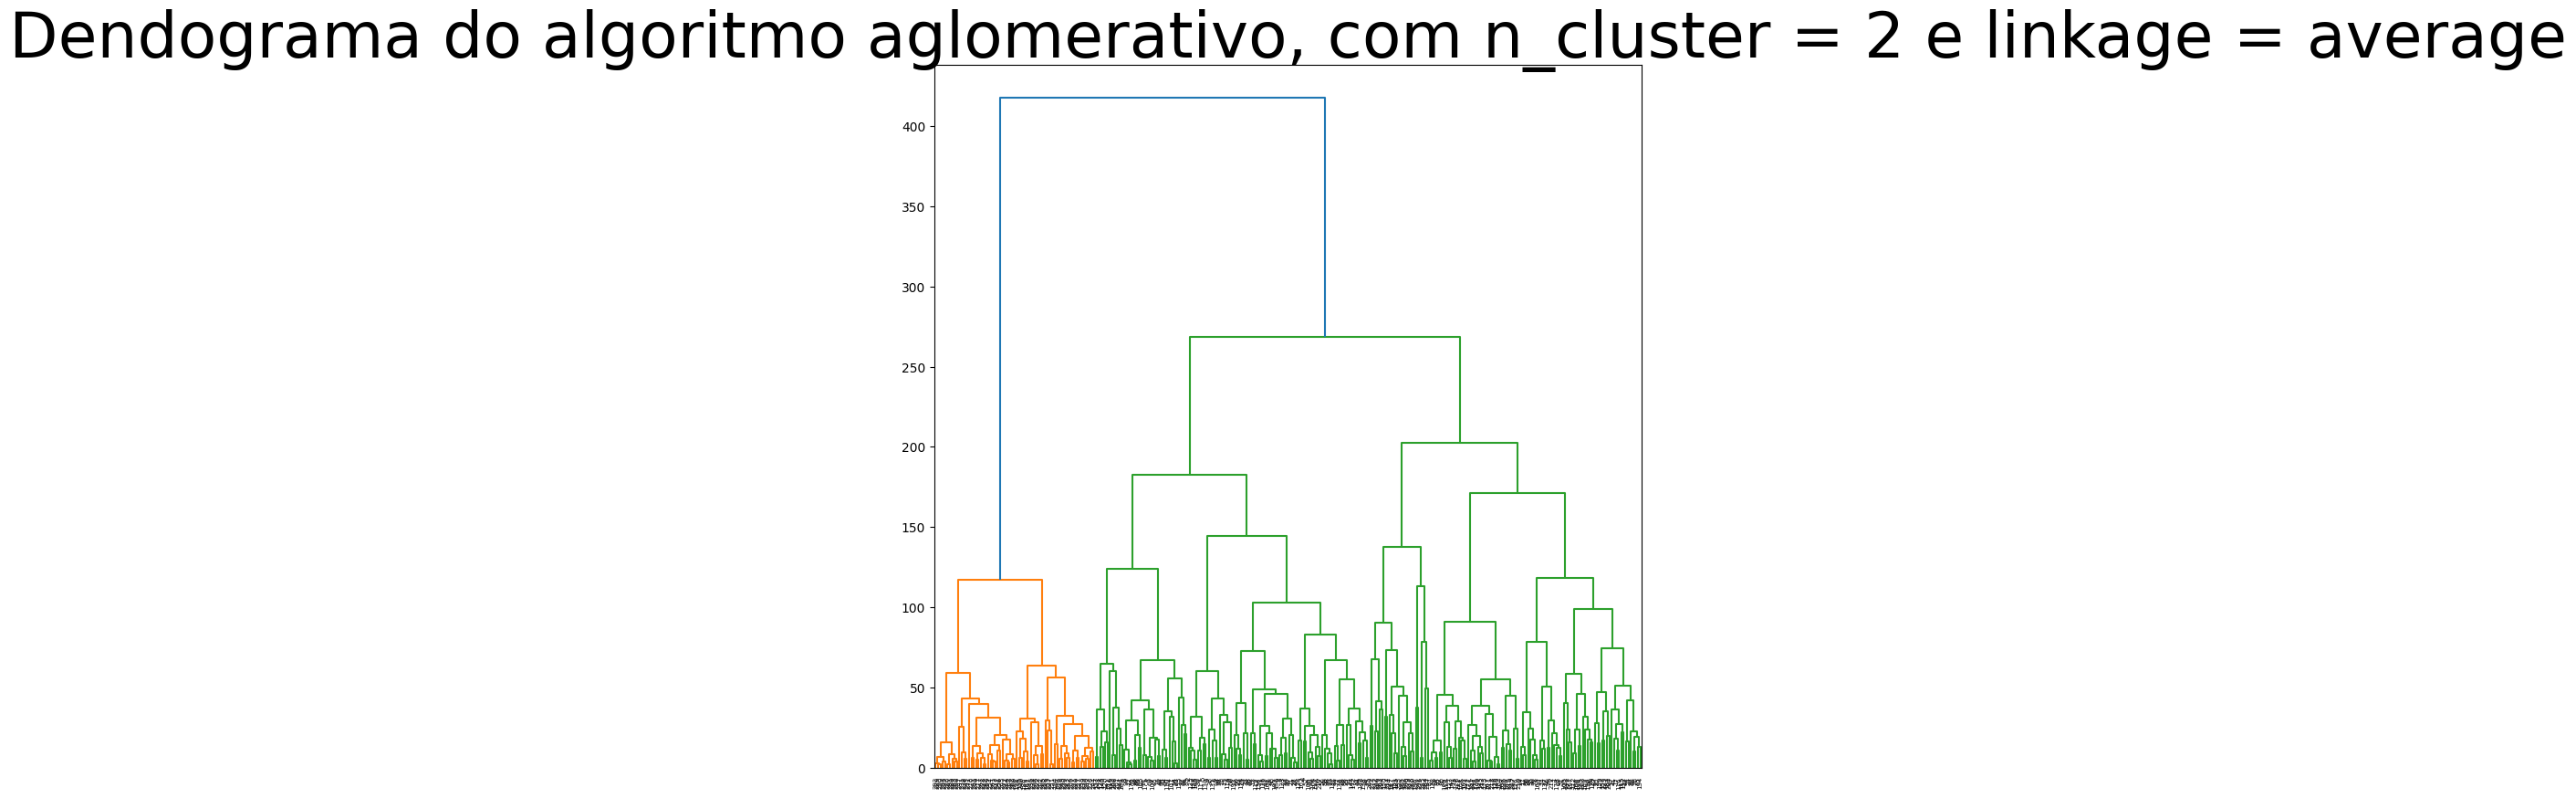

In [ ]:
agg = AgglomerativeClustering(n_clusters=2,linkage=linkage[2],metric='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg,linkage[2])

#### Com dados não normalizados e com outliers

In [ ]:
sc3 = []
for i in n_clust:
  #Exibição do índice de silhueta do modelo
  agg3 = AgglomerativeClustering(n_clusters=i,linkage=linkage[2],metric='euclidean',compute_distances=True)
  preds = agg3.fit_predict(df)
  score = silhouette_score(df, preds)
  sc3.append(score)
  print(f"Para n_clusters = {i} e linkage = {linkage[2]}, o valor do índice de silhueta é  {score}")

Para n_clusters = 2 e linkage = average, o valor do índice de silhueta é  0.6191309962384088
Para n_clusters = 3 e linkage = average, o valor do índice de silhueta é  0.5391076590023055
Para n_clusters = 4 e linkage = average, o valor do índice de silhueta é  0.354096740529279
Para n_clusters = 5 e linkage = average, o valor do índice de silhueta é  0.27160685411401325
Para n_clusters = 6 e linkage = average, o valor do índice de silhueta é  0.24893592085622462
Para n_clusters = 7 e linkage = average, o valor do índice de silhueta é  0.20330050469054078


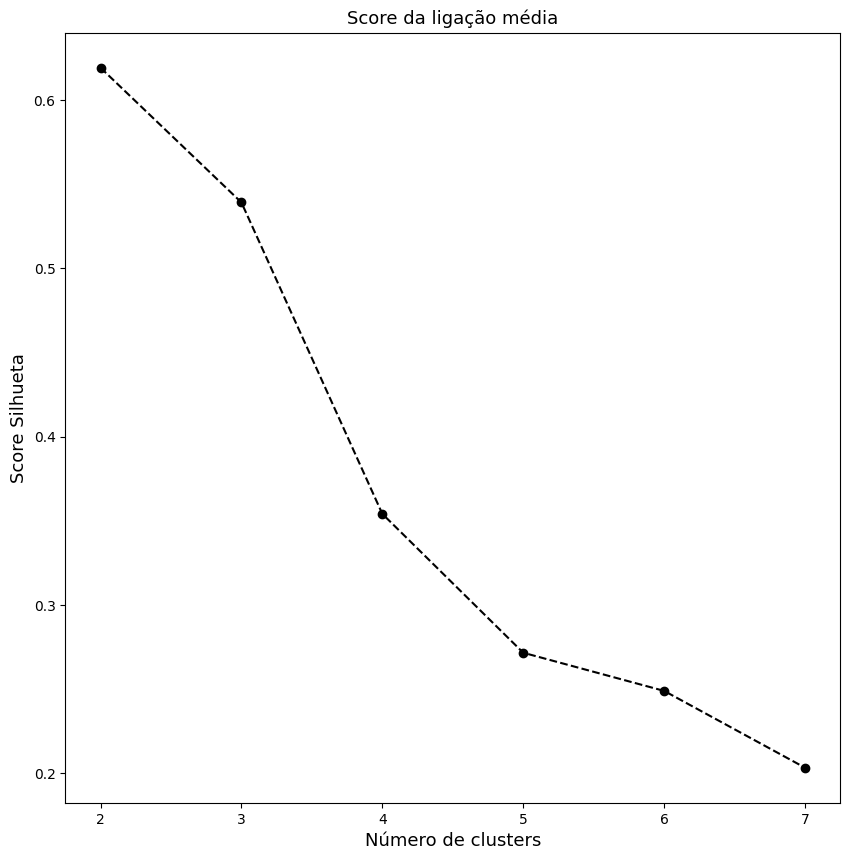

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(n_clust,sc3,'Score da ligação média', 'Número de clusters')

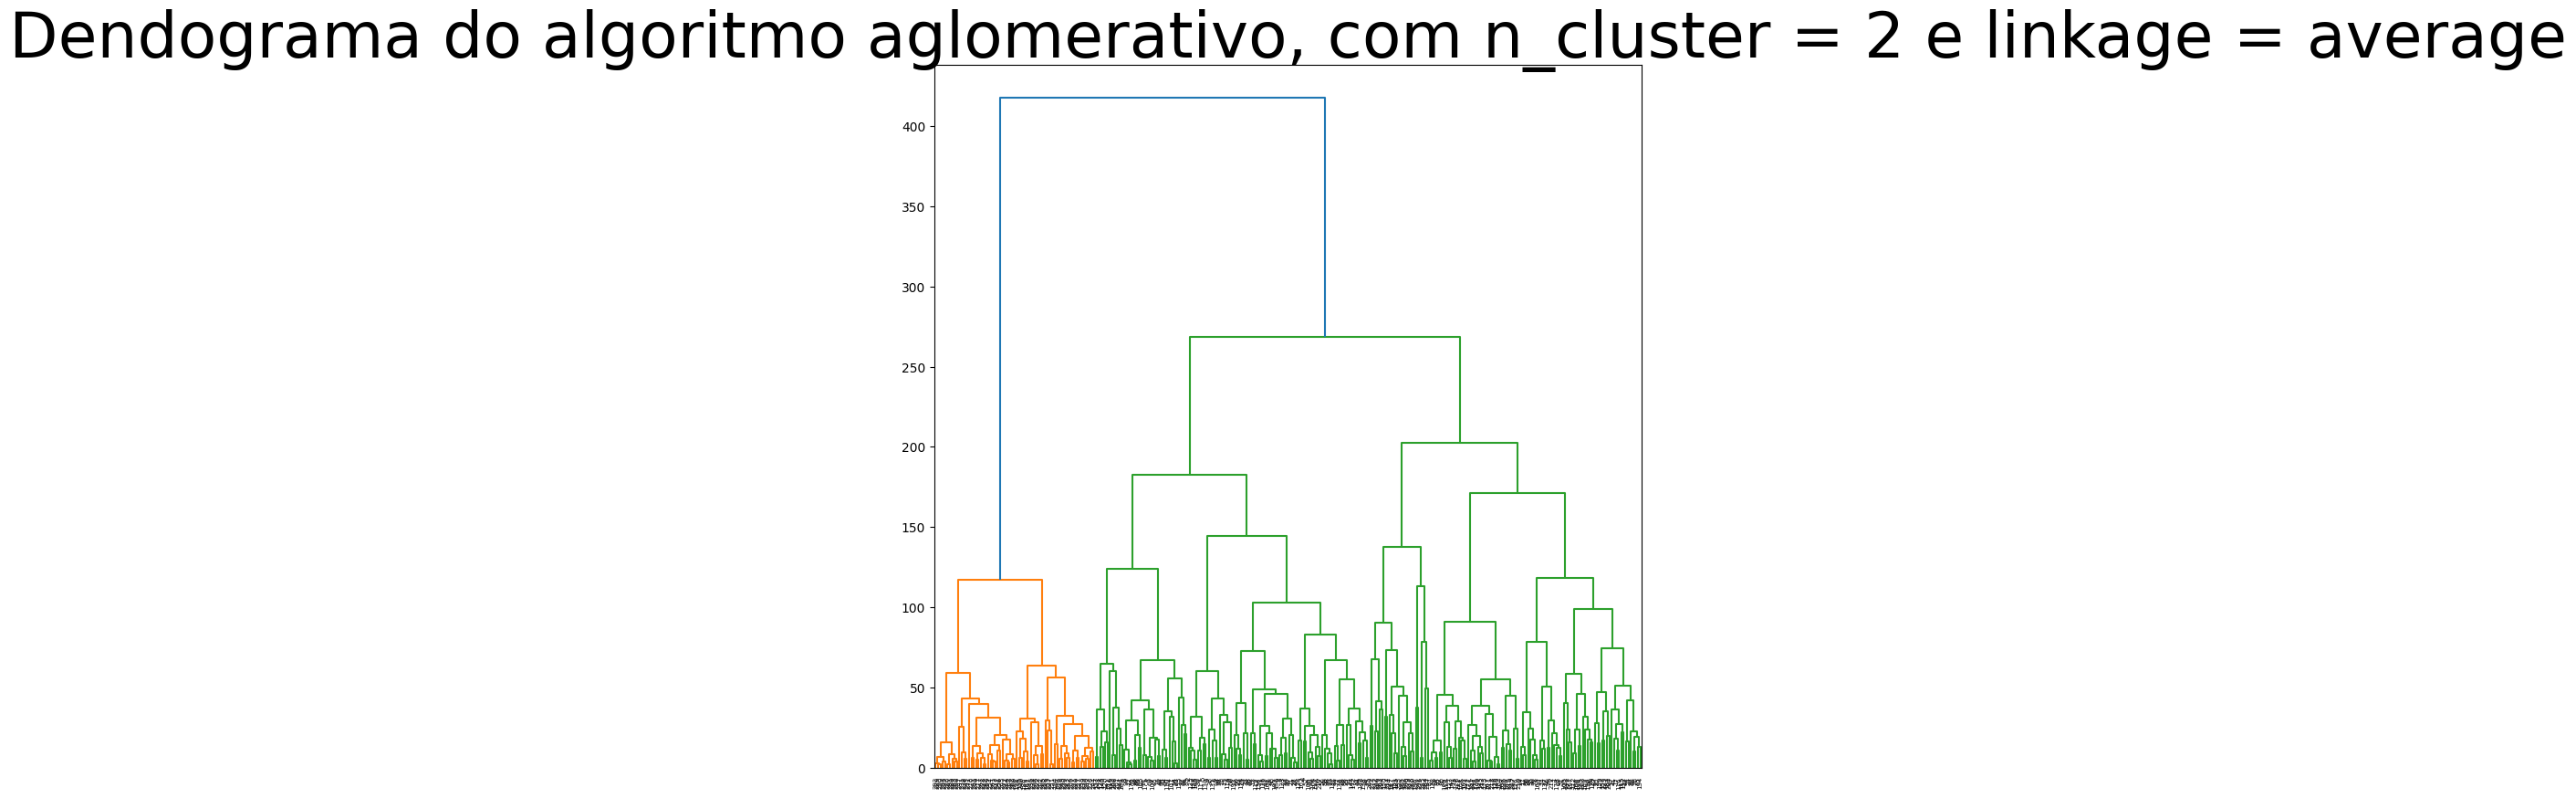

In [ ]:
agg = AgglomerativeClustering(n_clusters=2,linkage=linkage[2],metric='euclidean',compute_distances=True).fit(df)
plot_dendogram(agg,linkage[2])

## 4.3 HDBSCAN

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de agrupamento que:

  - Lida com clusters de densidades variáveis.
  - Gera uma hierarquia de clusters, incluindo subclusters.
  - Escolhe automaticamente o número de clusters, eliminando a necessidade de ajuste de parâmetros.
  - Identifica pontos de ruído.
  - É flexível e adequado para várias aplicações de agrupamento.

Em resumo, o HDBSCAN é uma ferramenta robusta e versátil para agrupar dados com diferentes densidades e complexidades, facilitando a análise de estruturas de clusters de forma automatizada.

In [ ]:
!pip install hdbscan

In [ ]:
#Importando o HDBSCAN
import hdbscan

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

In [ ]:
cluster_size = range(2, 20, 1)

In [ ]:
# Função auxiliar para plotar as árvores de maneira adequada
def plot_condensed_tree(hdb,min):
  hdb.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
  plt.title(f"Min cluster size igual à {min}",fontsize=20)
  plt.show()

In [ ]:
# Inicialização do contador
hdb = []
contador = 0

sc4 = []
for i in range(2,20,1):
  hdb.append(hdbscan.HDBSCAN(min_cluster_size=i, metric='euclidean'))
  hdb[contador] = hdb[contador].fit(mmo_df)
  hdb_preds = hdb[contador].fit_predict(mmo_df)
  score = silhouette_score(mmo_df, hdb_preds)
  sc4.append(score)
  print(f"Para n_cluster_size = {i}, o valor do índice de silhueta é  {score}")

  contador += 1

Para n_cluster_size = 2, o valor do índice de silhueta é  0.24614512015850162
Para n_cluster_size = 3, o valor do índice de silhueta é  0.22501733662821444
Para n_cluster_size = 4, o valor do índice de silhueta é  0.22486645315554205
Para n_cluster_size = 5, o valor do índice de silhueta é  0.1933948902681824
Para n_cluster_size = 6, o valor do índice de silhueta é  0.16924053799443756
Para n_cluster_size = 7, o valor do índice de silhueta é  0.16837720523894267
Para n_cluster_size = 8, o valor do índice de silhueta é  0.17030528591476898
Para n_cluster_size = 9, o valor do índice de silhueta é  0.1655645617439542
Para n_cluster_size = 10, o valor do índice de silhueta é  0.1609716846695873
Para n_cluster_size = 11, o valor do índice de silhueta é  0.15519540410712293
Para n_cluster_size = 12, o valor do índice de silhueta é  0.1414917105435365
Para n_cluster_size = 13, o valor do índice de silhueta é  0.13156502632953862
Para n_cluster_size = 14, o valor do índice de silhueta é  0.099

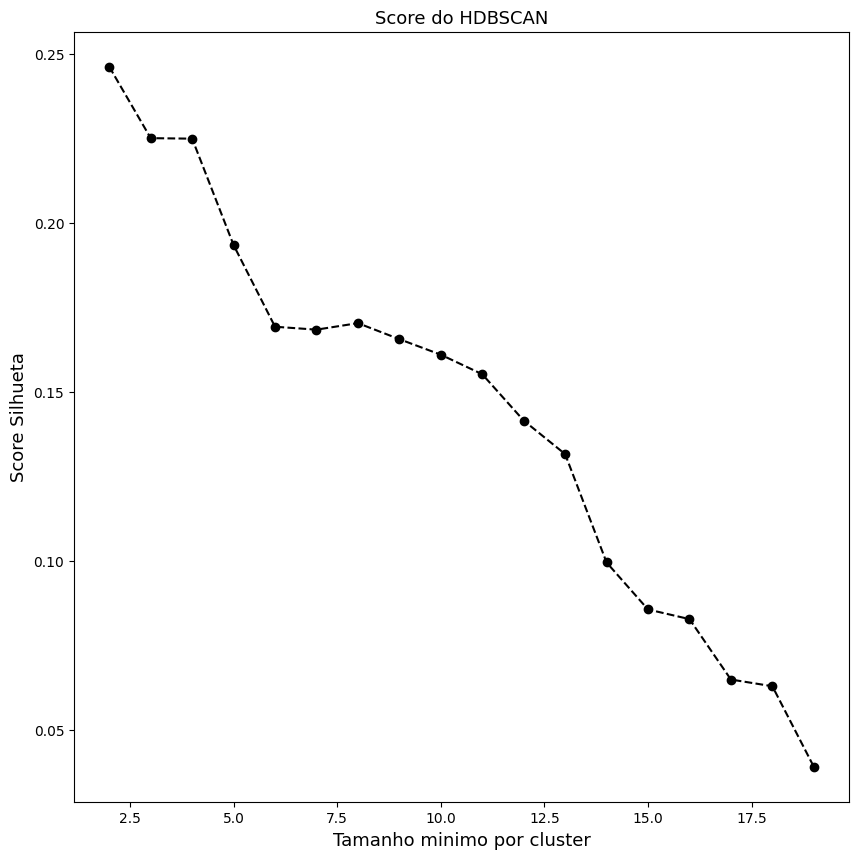

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plot_sil_score(cluster_size,sc4,'Score do HDBSCAN', 'Tamanho minimo por cluster')

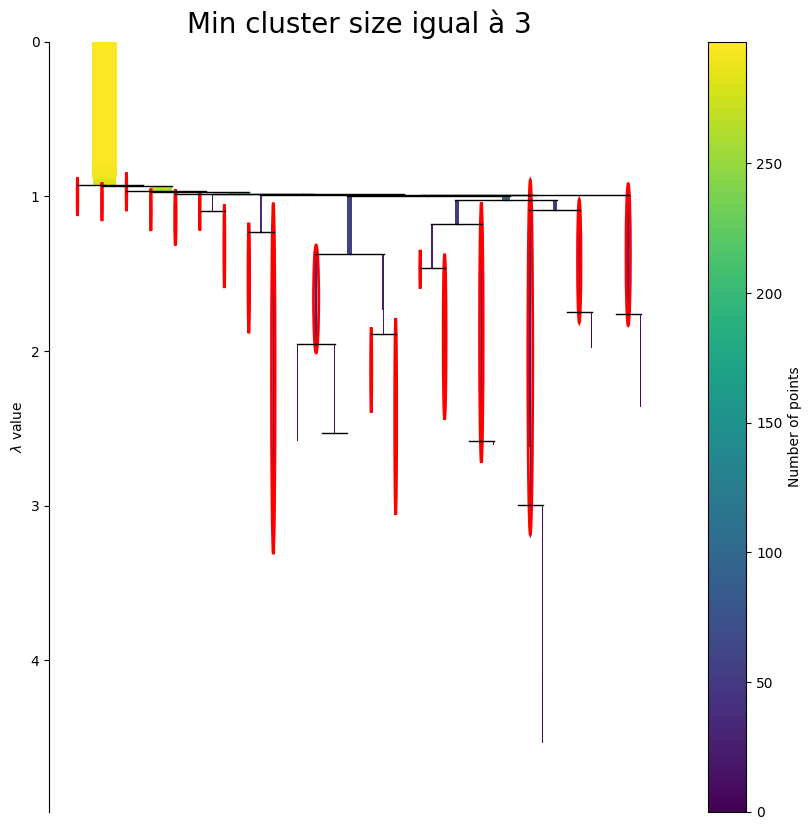

In [ ]:
plot_condensed_tree(hdb[1],cluster_size[1])

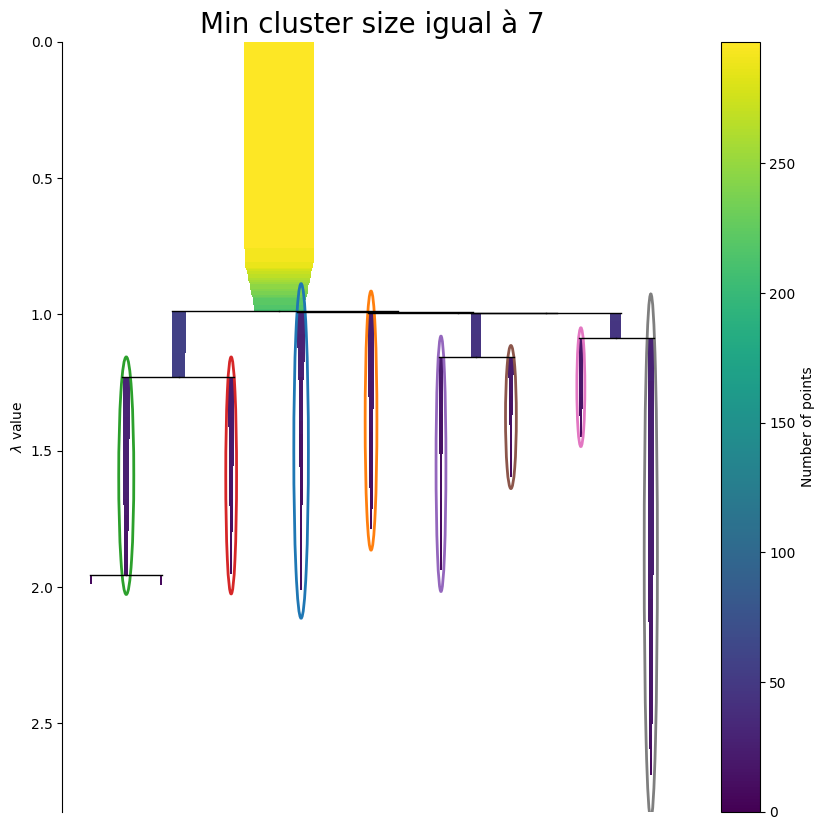

In [ ]:
plot_condensed_tree(hdb[5],cluster_size[5])

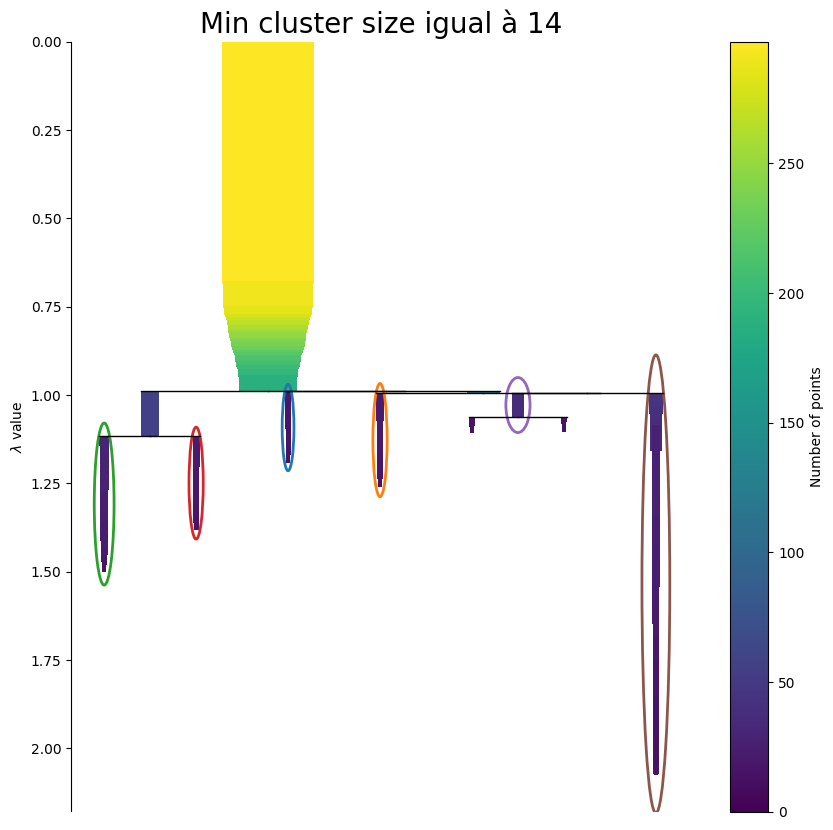

In [ ]:
plot_condensed_tree(hdb[12],cluster_size[12])

## 4.4 DBSCAN


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de agrupamento que:

- Identifica clusters com base na densidade de pontos em um conjunto de dados.
- É flexível em relação ao tamanho dos clusters e robusto a outliers.
- Não requer pré-especificação do número de clusters.
- Utiliza dois parâmetros principais: "eps" (raio de vizinhança) e "MinPts" (número mínimo de pontos próximos) para definir clusters com base na densidade.
- É adequado para dados com clusters de diferentes formas e tamanhos.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, AgglomerativeClustering

class Scaler2:
    standard_scaler: StandardScaler

    def __init__(self):
        self.standard_scaler = StandardScaler()

    def fit(self, X: pd.DataFrame):
        self.standard_scaler.fit(X)

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        transformed_matrix = self.standard_scaler.transform(X)
        return pd.DataFrame(transformed_matrix, columns=X.columns)

    def fit_transform(self, X: pd.DataFrame) -> pd.DataFrame:
        self.fit(X)
        return self.transform(X)

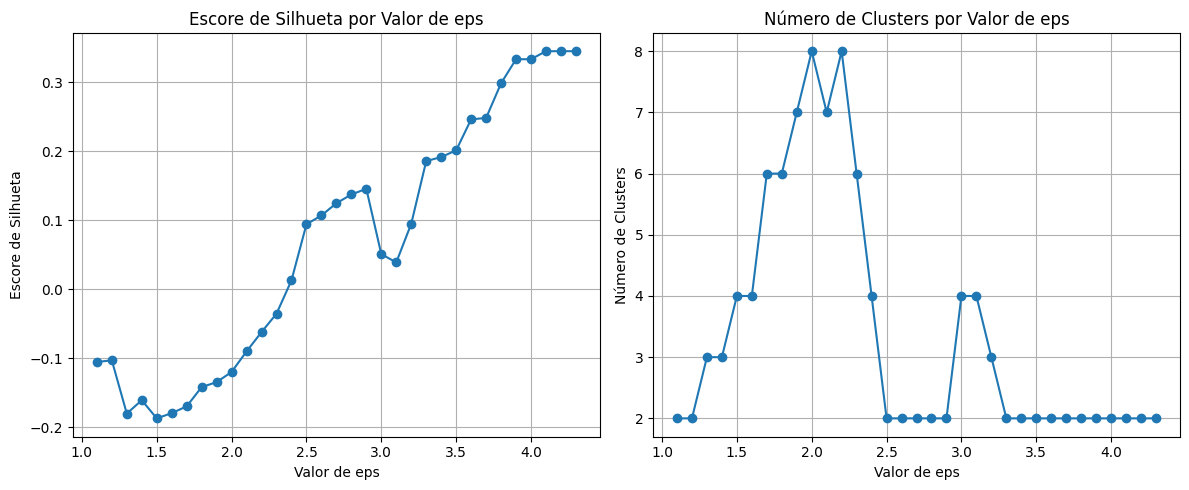

In [ ]:
df_scaled = Scaler2().fit_transform(mmo_df)

eps_values = np.arange(0.1, 10.0, 0.1)
valid_eps = []
scores = []
clusters = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps).fit(df_scaled)
    labels = dbscan.labels_

    # Verifique se há pelo menos dois clusters diferentes e nenhum rótulo de ruído (-1)
    if len(set(labels)) > 1 and -1 in labels:
        score = silhouette_score(df_scaled, labels)

        valid_eps.append(eps)
        scores.append(score)
        clusters.append(len(set(labels)))

if valid_eps:
    # Gráfico de Silhueta
    #Este gráfico mostra como o escore de silhueta, uma medida da qualidade dos clusters,
    # varia com diferentes valores de eps. O objetivo é encontrar o valor de eps que maximiza o escore de silhueta.
    # Valores mais próximos de 1 indicam clusters bem definidos, enquanto valores próximos de 0 sugerem sobreposição entre os clusters.
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(valid_eps, scores, marker='o', linestyle='-')
    plt.title("Escore de Silhueta por Valor de eps")
    plt.xlabel("Valor de eps")
    plt.ylabel("Escore de Silhueta")
    plt.grid()

    # Gráfico de Número de Clusters
    # Este gráfico mostra como o número de clusters encontrados varia com diferentes valores de eps.
    # Pode ajudar a identificar quantos clusters distintos estão presentes nos dados em diferentes densidades.
    plt.subplot(1, 2, 2)
    plt.plot(valid_eps, clusters, marker='o', linestyle='-')
    plt.title("Número de Clusters por Valor de eps")
    plt.xlabel("Valor de eps")
    plt.ylabel("Número de Clusters")
    plt.grid()

    plt.tight_layout()
    plt.show()
else:
    print("Nenhum valor válido de eps encontrado.")


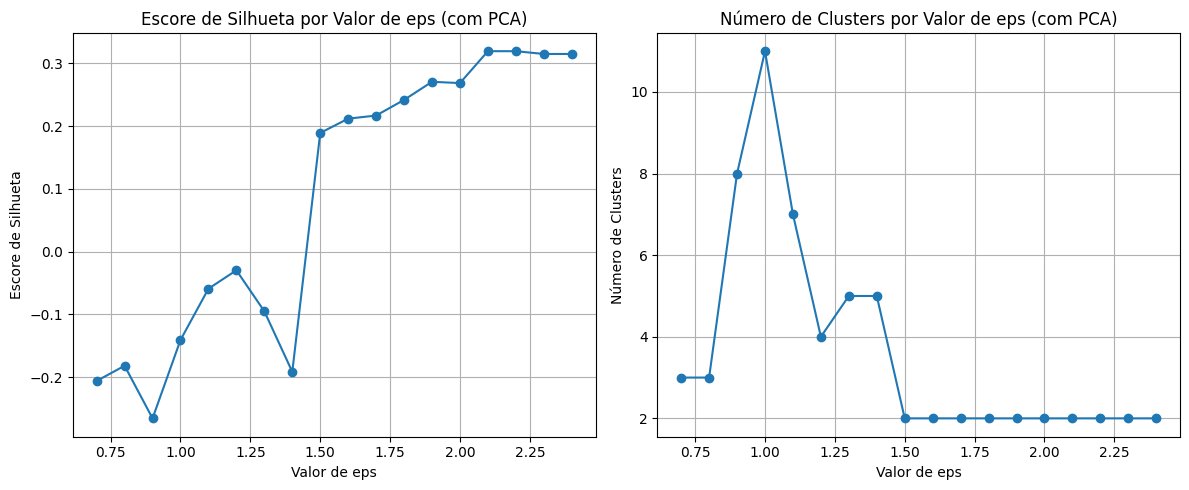

In [ ]:
# Escalonamento dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(mmo_df)

# Redução de dimensionalidade com PCA (5 componentes)
pca = PCA(n_components=5)
df_scaled_pca = pca.fit_transform(df_scaled)

eps_values = np.arange(0.1, 10.0, 0.1)
valid_eps = []
scores = []
clusters = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps).fit(df_scaled_pca)
    labels = dbscan.labels_

    # Verifique se há pelo menos dois clusters diferentes e nenhum rótulo de ruído (-1)
    if len(set(labels)) > 1 and -1 in labels:
        score = silhouette_score(df_scaled_pca, labels)

        valid_eps.append(eps)
        scores.append(score)
        clusters.append(len(set(labels)))

if valid_eps:
    # Gráfico de Silhueta
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(valid_eps, scores, marker='o', linestyle='-')
    plt.title("Escore de Silhueta por Valor de eps (com PCA)")
    plt.xlabel("Valor de eps")
    plt.ylabel("Escore de Silhueta")
    plt.grid()

    # Gráfico de Número de Clusters
    plt.subplot(1, 2, 2)
    plt.plot(valid_eps, clusters, marker='o', linestyle='-')
    plt.title("Número de Clusters por Valor de eps (com PCA)")
    plt.xlabel("Valor de eps")
    plt.ylabel("Número de Clusters")
    plt.grid()

    plt.tight_layout()
    plt.show()
else:
    print("Nenhum valor válido de eps encontrado (com PCA).")


Isso sugere que, após a aplicação da PCA, o valor de "eps" de 2 no espaço de características indica que os clusters são definidos com base na proximidade nesse espaço reduzido. O valor de 0.3 da silhueta sugere que esses clusters têm alguma qualidade, mas ainda podem ser refinados para melhor separar os pontos

## 5. Conclusão

Ao analisar a métrica de validação utilizada (índice de silhueta), o melhor método de agrupamento foi o algoritmo aglomerativo. Em que a medida de ligação simples foi a que se destacou com 0.73, tendo em sequência o melhor resultado a ligação completa, com 0.69 de score de silhueta, ambos com número de clusters igual à dois. Bem como, tivemos um resultado significativo para a ligação média, com score de silhueta de 0.61, também para dois clusters. Ressaltando que estes resultados foram obtidos com o conjunto de dados contendo outliers e também sem os dados estarem normalizados, podendo ser explicado pela escala de algum atributo estar interferindo positivamente para a distinção dos grupos.

O k-means, por sua vez, obteve seu melhor score de silhueta de 0.65 para os valores de PCA igual à três e número de clusters igual à 15. Entretando, o número de grupos é muito elevado para o conjunto de dados em questão, subdividindo muito as amostras e aparentemente sem resultados significativos para inferir sobre os grupos esperados (0-4). Contudo, outro resulado interessante que obtivemos foi com PCA igual à dois e número de clusters igual à 4, obtendo um score de silhueta de 0.59, em que o número de grupos formados ficam mais coerentes com o esperado para análise.

O algoritmo HDBSCAN infelizmente não mostrou um desempenho expressivo para o agrupamento do nosso conjunto de dados em questão, em que seu score de silhueta máximo foi de 0.24 com tamanho mínimo dos grupos igual à dois, porém com cerca de 18 grupos formados, o que gerou uma estratificação demasiada dos dados. Conforme o tamanho mínimo de elementos dos grupos foi aumentando, observou-se uma formação de cerca de 6 grupos, estando em conformidade com o esperado, contudo apresentado índices de silhueta muito baixos e consequentemente uma baixa separação dos grupos formados. Estes resultados ruins podem ter sido interferidos pela baixa quantidade de amostras contidas no conjunto de dados, cerca de 300, em que elas podem não se apresentar em um formato denso e assim prejudicar seu desempenho.

O algoritmo DBSCAN também não se mostrou tão relevante, connsiderando os valores aproximadamente máximos, um valor de silhueta de 0.3 sugere que os clusters têm alguma qualidade, mas pode haver alguma sobreposição ou mistura de pontos entre os clusters. Há algum grau de ambiguidade na atribuição de pontos aos clusters. O valor de "eps" de 4 indica que o DBSCAN está agrupando pontos que estão próximos dentro desse raio. Portanto, os clusters podem ser mais amplos, abrangendo áreas maiores no espaço de características.

Ao fim, nosso dataset apresentou diversos atributos relevantes para a formação de grupos de pacientes que podem apresentar falha cardíaca, em que os com melhores resultados apresentaram formação de dois grupos, muito próximo à quantidade de valores do atributo target ('num'), que possurem valores de 0-4, porém em muitos artigos que referenciam o dataset têm-se a abordagem mais comum de considerá-los apenas como 0 ou 1, ou seja, sem falha cardíca ou com falha cardíaca. Além da apuração obtida com boa pontuação para a formação de 4 grupos com k-means, o que pode-se explicar pela subdivisão do grupo dos pacientes com falha cardíaca.